# Материалы по проекту / Project materials
[Презентация / Presentation] - https://drive.google.com/file/d/1zW7PtV9K8nF6NBaaRuXv2K10aTSWpLXc/view?usp=sharing

[Дашборд / Dashboard] - https://public.tableau.com/views/_16800672453640/Dashboard1?:language=en-GB&publish=yes&:display_count=n&:origin=viz_share_link

# Описание проекта / Project description <a id='intro'></a>

Для интернет-магазина товаров для дома и быта «Пока все ещё тут» 

определена **задача** - **сегментировать покупателей по профилю потребления**.

Источник данных - файл ecommerce_dataset.csv.

**Цель** - определить покупательскую способность, поведение и предпочтения покупателей, получить рекомендации и на основе этого создавать более эффективные маркетинговые стратегии и продукты.

В рамках реализации проекта необходимо провести декомпозицию.
____

For the online store of goods for home and life "While everything is still here" **task** was set:

**Segment customers by consumption profile**.

The data source is the ecommerce_dataset.csv file.

**Goal** - determine the purchasing power, behavior and preferences of buyers, receive recommendations and, based on this, create more effective marketing strategies and products..

As part of the project, it is necessary to carry out decomposition.

**Шаг 1 "Обзор данных"**
 
* подбор библиотек
* изучение общей информации о датасете
* изучение формата и типов данных
* оценка числа пропусков, явных и скрытых дубликатов
___
**Step 1 "Data overview"**
 
* selection of libraries
* view general information about the dataset
* learning the format and data types
* estimate the number of gaps, explicit and hidden duplicates

**Шаг 2 "Предодработка данных"**
 
* очистка от дубликатов
* заполнение пропусков, где это необходимо
* приведение данных к нужным форматам, стилю
* изучение выбросов и их удаление при необходимости 
* иное
___
**Step 2 "Data preprocessing"**
 
* cleaning of duplicates
* fill in gaps where needed
* bringing data to the required formats, style
* study outliers and remove them if necessary
* other

**Шаг 3 "Исследовательский анализ данных (EDA)"**
 
* подсчет уникальных пользователей
* определить минимальную и максимальные даты
* подсчет количества заказов в день, неделю, месяц, сезон (3 месяца)
* определение общего количества заказов, а также максимальных, минимальных и средних заказов (в месяц);
* подсчет выручки
* определить средний чек на покупателя
* определить периодичность заказов
* выделение категорий товаров (часто встречающиеся)
* выделение топ-товаров и антитоп-товаров
* подсчет “постоянных” клиентов
___
**Step 3 "Exploratory Data Analysis (EDA)"**
 
* unique users count
* define minimum and maximum dates
* counting the number of orders per day, week, month, season (3 months)
* determination of the total number of orders, as well as maximum, minimum and average orders (per month);
* revenue calculation
* determine the average check per customer
* determine the frequency of orders
* selection of product categories (frequently occurring)
* selection of top products and anti-top products
* counting "regular" customers

**Шаг 4 "Сегментация покупателей"**

* обоснование сегментации покупателей
* сегментирование покупателей на основе алгоритма 1 - агломеративной иерархической кластеризации, позволяюшей учесть все признаци (например, количество товаров в заказе, частоту покупок, средний чек и другие)
* сегментирование покупателей на основе алгоритма 2 - K-Means (sklearn.cluster), учитывающий ближайшие расстояния между схожими признаками(после оценки оптимального числа кластеров)
* на основе метрики силуэта (silhouette score) рассмотрим насколько  сильно отличаются внутрикластерные и межкластерные расстояния чтобы понять, какой алгоритм сгруппировал лучше
___

**Step 4 "Customer Segmentation"**

* rationale for customer segmentation
* segmentation of buyers based on algorithm 1 - agglomerative hierarchical clustering, which allows to take into account all the features (for example, the number of goods in an order, the frequency of purchases, the average check, and others)
* customer segmentation based on algorithm 2 - K-Means (sklearn.cluster), taking into account the nearest distances between similar features (after estimating the optimal number of clusters)
* based on the silhouette metric (silhouette score), let's consider how much the intra-cluster and inter-cluster distances differ in order to understand which algorithm grouped better

**Шаг 5 "Проверка статистических гипотез"**
 
* формулирование нулевой и альтернативных гипотез (например, проверка корректности получившихся кластеров на основе того, что выручка (средний чек) по кластерам отличается / не отличается)
* задание уровня значимости, на котором в дальнейшем и будет сделан вывод о справедливости гипотезы
* для проверки гипотезы применим критерий Манна—Уитни (stats.mannwhitneyu), позволяющий принять или опровергнуть гипотезу, его обоснование
* вывод об истинности гипотезы
___
**Step 5 "Testing statistical hypotheses"**
 
* formulation of null and alternative hypotheses (for example, checking the correctness of the resulting clusters based on the fact that the revenue (average bill) differs / does not differ by clusters)
* setting the level of significance, at which in the future a conclusion will be made about the validity of the hypothesis
* to test the hypothesis, we use the Mann-Whitney test (stats.mannwhitneyu), which allows you to accept or refute the hypothesis, its justification
* conclusion about the truth of the hypothesis

**"Выводы и рекомендации"** 
___

**"Conclusions and Recommendations"**

[В начало / To the begining](#intro)

# **Шаг 1 "Обзор данных"** <a id='intro_1'></a>
 
* подбор библиотек
* изучение общей информации о датасете
* изучение формата и типов данных
* оценка числа пропусков, явных и скрытых дубликатов
___
**Step 1 "Data overview"**
 
* selection of libraries
* view general information about the dataset
* learning the format and data types
* estimate the number of gaps, explicit and hidden duplicates

In [1]:
#импортируем библиотеки
#import libraries
import pandas as pd
import re
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import itertools
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import scipy.stats as st
from scipy.stats import ttest_ind
from itertools import combinations

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


import plotly.express as px
from plotly import graph_objects as go

In [2]:
#чтение файла и создание датафрейма
#read data
df = pd.read_csv('/datasets/ecommerce_dataset.csv')
df

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019103111,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0
6733,2019103112,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019103113,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0
6735,2019103114,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0


In [3]:
#общая информация
#general infomation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


Данные представлены в виде таблицы из 6 737 строк и 6 столбцов. 

Столбцы таблицы содержат в себе следующую информацию:

- date — дата заказа;
- customer_id — идентификатор покупателя;
- order_id — идентификатор заказа;
- product — наименование товара;
- quantity — количество товара;
- price — цена товара.

____
The data is presented as a table with 6,737 rows and 6 columns.

The columns have calculated the totals in themselves:

- date — order date;
- customer_id — customer identifier;
- order_id — order identifier;
- product - product name;
- Quantity - quantity of goods;
- price - the price of the product.

In [4]:
#смотрим пропуски
#checking missing values
df.isna().sum()

date           0
customer_id    0
order_id       0
product        0
quantity       0
price          0
dtype: int64

Пропуски отсутствуют
___
There are no passes

In [5]:
#смотрим наличие явных дубликатов
#checking for obvious dublicates
df.duplicated().sum()

0

Явные дубликаты отсутствуют
___
There are no obvious duplicates

In [6]:
#смотрим уникальные значения по столбцу customer_id
#look at the unique values by the customer_id column
display(df['customer_id'].value_counts().head(20))

1d6c8c1f-a799-4418-9af2-1ded47d7a85c    888
db77c238-3c80-4032-9e3c-c30a43f4a650    203
c971fb21-d54c-4134-938f-16b62ee86d3b    144
3d5fef90-4a65-4a7e-84cf-010eba7b038d     90
42d3cb27-6519-4627-9b4a-5aa8ee600203     63
57cc80a2-2610-4eef-9457-e7c3bf0c72f0     60
d3b9ffea-d143-4747-8d59-74ab843d1ad6     51
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f     50
0184f535-b60a-4914-a982-231e3f615206     47
4d93d3f6-8b24-403b-a74b-f5173e40d7db     47
760aa067-90c3-4794-b7a9-a8831197388b     36
3ee43256-af7d-4036-90d4-eeefa1afc767     34
2a0acc09-e343-4f92-b5c0-f598ef2b07d4     31
1420716a-02ef-426f-828d-fddcb0e1f532     30
a3394ff2-4cd2-4332-9f6c-2668ac608fbc     30
603e92a4-fc7f-4203-9ca5-103da5b008ac     29
e58284ef-20d2-42dd-879d-fdd6bd653f3f     28
4f424a7c-3563-4316-b21f-1a65601226b2     27
7e0fb269-d55f-4e36-bcc4-24968b70e009     26
7d5d5657-5fdc-40d1-b7b6-bb04ede92b53     26
Name: customer_id, dtype: int64

In [7]:
#смотрим уникальные значения по столбцу order_id
#look at the unique values by the order_id column
display(df['order_id'].value_counts().head(20))

14833    888
14835    203
14753     90
14897     63
70960     60
14698     51
68760     50
14715     36
14500     34
14688     31
14705     29
14649     28
14597     28
14827     27
14541     26
14848     26
14778     25
14893     24
69162     23
14701     22
Name: order_id, dtype: int64

Наблюдается совпадение в количестве уникальных пользователей и в количестве уникальных заказов. Например по заказам 14833,14835, 14753 и другим.
___
There is a match in the number of unique users and in the number of unique orders. For example, for orders 14833,14835, 14753 and others.

In [8]:
#смотрим уникальные значения по столбцу product
#look at the unique values by the product column
display(df['product'].value_counts().head(20))

Рассада Кабачка сорт Зебра кассета 6 шт E6                              79
Рассада Кабачка сорт Золотинка кассета 6 шт E6                          78
Рассада Кабачка сорт Белогор кассета 6 шт E6                            77
Тагетис крупноцветковый рассада однолетних цветов в кассете по 10 шт    76
Рассада Огурца сорт Каролина кассета 6 шт E6                            76
Рассада Кабачка сорт Горный, кассета по 6шт                             76
Рассада Кабачка сорт Аэронавт, кассета по 6шт                           76
Пеларгония розебудная Red Pandora укорененный черенок                   76
Рассада Огурец Фараон ячейки по 6 шт Е6                                 76
Рассада Кабачка сорт Сосновский, кассета по 6шт                         75
Рассада Патиссона сорт НЛО Белый, кассета по 6шт                        75
Рассада Патиссона сорт Диск, кассета по 6шт                             74
Рассада Огурец Кристина ячейки по 6 шт Е6                               74
Сумка-тележка 2-х колесна

Необходимо разбить товары на категории так как в одной колонке представлены совершенно разнородные товары: есть и семена, есть бытовые приспособления, есть и мебельные товары, и другие категории.
___
It is necessary to break the goods into categories, since completely heterogeneous goods are presented in one column: there are seeds, there are household appliances, there are furniture goods, and other categories.

In [9]:
#смотрим наличие неявных дубликатов по столбцам: customer_id, order_id, product
#check for implicit duplicates by columns: customer_id, order_id, product
df[['customer_id', 'order_id', 'product']].duplicated().sum()

1886

In [10]:
#сброс ограничений на количество символов в записи, чтобы просмотреть всю запись в колонке
#reset entry character limit to view the entire entry in a column
pd.set_option('display.max_colwidth', None)

In [11]:
#просмотр дубликатов в конкретных столбцах
#identify duplicate rows across 'name' and 'address' columns
duplicateRows = df[df.duplicated(['customer_id', 'order_id', 'product'])]

#просмотр
#view duplicate rows
display((duplicateRows).head(10))

,date,customer_id,order_id,product,quantity,price
58,2018100218,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
59,2018100219,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
60,2018100220,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
63,2018100304,b731df05-98fa-4610-8496-716ec530a02c,68474,Доска гладильная Eurogold Professional 130х48 см металлическая сетка 35748W,1,3299.0
94,2018100413,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,Эвкалипт Гунни d-17 см h-60 см,1,1409.0
126,2018100717,ce0e0c29-8c8b-4714-84bd-80957224d4cf,68557,Сумка-тележка хозяйственная Gimi Market синяя,1,1874.0
147,2018100819,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 15,0 л пищевой овальный ""Ekko"" 2775, 1404032",1,209.0
148,2018100819,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 18,0 л пищевой (Иж), 1404047",1,194.0
149,2018100819,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 20,0 л пищевой (Минеральные воды), 1404045",1,277.0
150,2018100819,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"Таз пластмассовый 24,0 л пищевой круглый (Иж), 1404006",1,239.0


Выявлены дублирующие позиции.
___
Duplicate positions have been identified.

In [12]:
#оценим долю дубликатов
print('Количество строк =', df.count())

df_2 = df[['customer_id', 'order_id', 'product', 'price']].duplicated().sum()
print('Количество дубликатов =', df_2)

print(f'Доля дубликатов = {round((df_2)/df.count()*100,2)}%')

Количество строк = date           6737
customer_id    6737
order_id       6737
product        6737
quantity       6737
price          6737
dtype: int64
Количество дубликатов = 1884
Доля дубликатов = date           27.96
customer_id    27.96
order_id       27.96
product        27.96
quantity       27.96
price          27.96
dtype: float64%


In [13]:
df[['customer_id', 'order_id', 'product', 'price']].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6732    False
6733    False
6734    False
6735    False
6736     True
Length: 6737, dtype: bool

In [14]:
#посчитаем уникальные значения по каждой колонке
print('\33[1m' + 'Уникальные значения по колонкам:')
df.nunique()

Уникальные значения по колонкам:


date           2606
customer_id    2451
order_id       2784
product        2343
quantity         49
price           360
dtype: int64

In [15]:
#смотрим статистическое описание данных по датафрейму
#statistical information
df.describe()

,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


Среднее значение по колонкам quantity и price выше медианного больше чем в 2 раза. 

Одновременно высокое значение стандартного отклонения (std) указывает на распределенение по максимальному диапазону значений. Эти два фактора отражают влияние выбросов.
___
The average value for the quantity and price columns is more than 2 times higher than the median.

At the same time, a high standard deviation (std) indicates a distribution over the maximum range of values. These two factors reflect the impact of emissions.

**Вывод / Conclusion:**

Датасет содержит в себе более 6700 строк и 6 колонок, пропуски отсутствуют

Написание столбцов - в едином стиле

Колонку date - необходимо привести к нужному формату (дата/время) и сменить числовой тип на тип datetime64

Содержание колонки product необходимо привести к строчному написанию в целях дальнейшей обработки в соотвествии с шагами декомпозиции

Доля неявных дубликатов составляет почти 28% (1886 = 27.99%) от общих данных. Это достаточно большой процент, влияющий на корректный анализ данных. Вероятно имеет место быть техническая ошибка, рекомендуется обратить на это внимание.

Уникальных покуавтелей - 2 451 чел. При этом, уникальных заказов - 2 784 при 2 343 уникальных товарах. Это может говорить о том, что на один заказ приходится несколько товаров, или же, что один заказ дублируется несколько раз.

Количество товаров в основном 1, однако имеется максимальное значение = 1000. Среднее значение количества товаров - 2,5 несмотря на то, что с 0-го по 75-ий перцентили количество товаров представлено в единичном виде. Вероятно на среднее значение повлияли выбросы. 

Минимальная стоимость товара = 9 руб., максимальная = 14 917. Медианное значение = 135 руб., среднее = 462 руб.
___
The dataset contains more than 6700 rows and 6 columns, there are no gaps

Writing columns - in the same style

Column date - must be converted to the desired format (date / time) and change the numeric type to datetime64

The contents of the product column must be reduced to lowercase for further processing in accordance with the decomposition steps

The share of implicit duplicates is almost 28% (1886 = 27.99%) of the total data. This is a fairly large percentage that affects the correct analysis of the data. There is probably a technical error, it is recommended to pay attention to this.

Unique buyers - 2 451 people. At the same time, there are 2,784 unique orders with 2,343 unique products. This may indicate that there are several products per order, or that one order is duplicated several times.

The number of items is mostly 1, but there is a maximum value of 1000. The average value of the number of items is 2.5, despite the fact that from the 0th to the 75rd percentile the number of items is presented in a single form. The outliers probably affected the mean.

Minimum cost of goods = 9 rubles, maximum = 14,917. Median value = 135 rubles, average = 462 rubles.

# **Шаг 2 "Предодработка данных"** <a id='intro_2'></a>
 
* очистка от дубликатов
* заполнение пропусков, где это необходимо
* приведение данных к нужным форматам, стилю
* изучение выбросов и их удаление при необходимости 
* иное
___
**Step 2 "Data preprocessing"**
 
* cleaning of duplicates
* fill in gaps where needed
* bringing data to the required formats, style
* study outliers and remove them if necessary
* other

In [16]:
#перевед числового типа столбца date в тип datetime64
#conversion of the numeric type of the date column to the datetime64 type
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d%H%M')

#сортируем
#sorting
df.sort_values(by='date')

,date,customer_id,order_id,product,quantity,price
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
...,...,...,...,...,...,...
6732,2019-10-31 01:01:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж), 1404094",1,404.0
6733,2019-10-31 01:02:00,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0
6734,2019-10-31 01:03:00,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, малиновая с красным, полумахровая",1,157.0
6735,2019-10-31 01:04:00,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1404021",1,397.0


In [17]:
#проверяем типы
#checking types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6737 non-null   datetime64[ns]
 1   customer_id  6737 non-null   object        
 2   order_id     6737 non-null   int64         
 3   product      6737 non-null   object        
 4   quantity     6737 non-null   int64         
 5   price        6737 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 315.9+ KB


In [18]:
#смотрим уникальные значения по столбцу date
#look at the unique values by the date column
df['date'].sort_values().unique()

array(['2018-10-01T00:00:00.000000000', '2018-10-01T00:08:00.000000000',
       '2018-10-01T00:09:00.000000000', ...,
       '2019-10-31T01:03:00.000000000', '2019-10-31T01:04:00.000000000',
       '2019-10-31T01:06:00.000000000'], dtype='datetime64[ns]')

Покупки совершались в интернет-магазине в периодмс 1.10.2018г. по 31.10.2019г. 

Что составляет 1 год и 1 месяц.

In [19]:
#Добавим столбец 'year_month' в таблицу df с годом и месяцем
#Add column 'year_month' to df table with year and month
df['year_month'] = df['date'].astype('datetime64[M]') 
df.head()

,date,customer_id,order_id,product,quantity,price,year_month
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,2018-10-01
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01


In [20]:
#Добавим столбец 'year_month_day' в таблицу df с годом, месяцем и днем
#Add column 'year_month' to df table with year and month
df['year_month_day'] = df['date'].astype('datetime64[D]') 
df.head()

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,2018-10-01
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,2018-10-01,2018-10-01
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10-01
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,2018-10-01
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,2018-10-01


In [21]:
#Добавим столбец 'month' в таблицу df с номером месяца
#Add column 'month' to df table with month number
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,2018-10-01,10
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,2018-10-01,2018-10-01,10
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10-01,10
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,2018-10-01,10
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,2018-10-01,10


In [22]:
#Добавим столбец 'week' в таблицу df с номером месяца
#Add column 'month' to df table with month number
df['week'] = pd.DatetimeIndex(df['date']).week
df.head()

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,2018-10-01,10,40
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,2018-10-01,2018-10-01,10,40
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10-01,10,40
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,2018-10-01,10,40
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,2018-10-01,10,40


In [23]:
#приводим значения столбца product к нижнему регистру
#to reduce the values of the product column to lowercase 
df['product'] = df['product'].str.lower()
df.head()

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018-10-01,10,40
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-01,2018-10-01,10,40
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10-01,10,40
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018-10-01,10,40
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018-10-01,10,40


In [24]:
#проверим еще раз уникальные значения по колонкам
#check again unique values ​​by columns
df.nunique()

date              2606
customer_id       2451
order_id          2784
product           2341
quantity            49
price              360
year_month          13
year_month_day     394
month               12
week                52
dtype: int64

После приведения к строчному фомату, количество уникальных значений по колонке product уменьшилось на 2 единицы. Значит присуствовали неявные дубликаты с разными регистрами.
___
After converting to a string format, the number of unique values ​​in the product column decreased by 2 units. So there were implicit duplicates with different registers.

In [25]:
#посмотрим еще раз на дубликаты по столбцам
##look again at duplicates by columns
duplicateRows = df[df.duplicated(['customer_id', 'order_id', 'product', 'price'])]

#просмотр
#view duplicate rows
display((duplicateRows).head(10))

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week
58,2018-10-02 01:08:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299.0,2018-10-01,2018-10-02,10,40
59,2018-10-02 01:09:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299.0,2018-10-01,2018-10-02,10,40
60,2018-10-02 02:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299.0,2018-10-01,2018-10-02,10,40
63,2018-10-03 00:04:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299.0,2018-10-01,2018-10-03,10,40
94,2018-10-04 01:03:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,эвкалипт гунни d-17 см h-60 см,1,1409.0,2018-10-01,2018-10-04,10,40
126,2018-10-07 01:07:00,ce0e0c29-8c8b-4714-84bd-80957224d4cf,68557,сумка-тележка хозяйственная gimi market синяя,1,1874.0,2018-10-01,2018-10-07,10,40
147,2018-10-08 01:09:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"таз пластмассовый 15,0 л пищевой овальный ""ekko"" 2775, 1404032",1,209.0,2018-10-01,2018-10-08,10,41
148,2018-10-08 01:09:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"таз пластмассовый 18,0 л пищевой (иж), 1404047",1,194.0,2018-10-01,2018-10-08,10,41
149,2018-10-08 01:09:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"таз пластмассовый 20,0 л пищевой (минеральные воды), 1404045",1,277.0,2018-10-01,2018-10-08,10,41
150,2018-10-08 01:09:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"таз пластмассовый 24,0 л пищевой круглый (иж), 1404006",1,239.0,2018-10-01,2018-10-08,10,41


In [26]:
#отобразим сумму дубликатов
#dublicates sum
df[['customer_id', 'order_id', 'product']].duplicated().sum()

1886

In [27]:
#посмотрим еще раз на дубликаты по столбцам, но уточним дату
#look again at duplicates by columns
duplicateRows_date = df[df.duplicated(['customer_id', 'order_id', 'product', 'price', 'year_month_day'])]

#просмотр
#view duplicate rows
display((duplicateRows_date).head(10))

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week
59,2018-10-02 01:09:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299.0,2018-10-01,2018-10-02,10,40
60,2018-10-02 02:00:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299.0,2018-10-01,2018-10-02,10,40
94,2018-10-04 01:03:00,32de7df8-8d4f-4c84-a7b9-c41d00dd83ba,68522,эвкалипт гунни d-17 см h-60 см,1,1409.0,2018-10-01,2018-10-04,10,40
126,2018-10-07 01:07:00,ce0e0c29-8c8b-4714-84bd-80957224d4cf,68557,сумка-тележка хозяйственная gimi market синяя,1,1874.0,2018-10-01,2018-10-07,10,40
147,2018-10-08 01:09:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"таз пластмассовый 15,0 л пищевой овальный ""ekko"" 2775, 1404032",1,209.0,2018-10-01,2018-10-08,10,41
148,2018-10-08 01:09:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"таз пластмассовый 18,0 л пищевой (иж), 1404047",1,194.0,2018-10-01,2018-10-08,10,41
149,2018-10-08 01:09:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"таз пластмассовый 20,0 л пищевой (минеральные воды), 1404045",1,277.0,2018-10-01,2018-10-08,10,41
150,2018-10-08 01:09:00,3de09660-90bc-4a28-aaf1-34c8435fe59c,68574,"таз пластмассовый 24,0 л пищевой круглый (иж), 1404006",1,239.0,2018-10-01,2018-10-08,10,41
281,2018-10-17 01:03:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68668,щетка для посуды *мила* sv3182 1807009,50,27.0,2018-10-01,2018-10-17,10,42
282,2018-10-17 01:03:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68668,"щетка-утюжок с ручкой миди, standart, york, g1126",50,44.0,2018-10-01,2018-10-17,10,42


Так, видим, что например заказ 68474 был оформлен на один и тот же заказ на одну и ту же сумму 3 раза на одного и того же пользователя, но на разную дату: дважды на 2018-10-02 и повторно на дату 2018-10-03.

Получается, что меются дубликаты также по разным датам. 

Вероятно имеет место быть техническая ошибка или данные выгружены некорректно. Принимаем решение оставить последние по дате заказы, а предыдущие дубли (почти 28%) - удалить, поскольку они могут некорректно повлиять на анализ покупательской активности.
___
So, we see that, for example, order 68474 was placed for the same order for the same amount 3 times for the same user, but on a different date: twice on 2018-10-02 and again on the date 2018-10 -03.

It turns out that there are duplicates also on different dates.

Probably there is a technical error or the data was uploaded incorrectly. We make a decision to leave the latest orders by date, and delete the previous duplicates (almost 28%), since they may incorrectly affect the analysis of purchasing activity.

In [28]:
#удалим найденные дубликаты, оставив последние по дате
#delete found duplicates, leaving the latest by date
df = df.drop_duplicates(subset=['customer_id', 'order_id', 'product', 'price'], keep='last')

In [29]:
#оценим количество строк
#estimate the number of rows
df.shape

(4853, 10)

Датафрейм уменьшился на количество удаленных неявных дубликатов - вместо 6737 строк стало 4853.
___
The dataframe has decreased by the number of removed implicit duplicates - instead of 6737 rows, it has become 4853.

In [30]:
#проверим какой-нибудь заказ по дате
#check some order by date
df[df['order_id'] == 68474]

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week
63,2018-10-03 00:04:00,b731df05-98fa-4610-8496-716ec530a02c,68474,доска гладильная eurogold professional 130х48 см металлическая сетка 35748w,1,3299.0,2018-10-01,2018-10-03,10,40


In [31]:
#добавим столбец общей ценой 
#add column "total"
df['total'] = df['quantity'] * df['price'] 
df.head()

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018-10-01,10,40,142.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-01,2018-10-01,10,40,194.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10-01,10,40,112.0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018-10-01,10,40,179.0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018-10-01,10,40,112.0


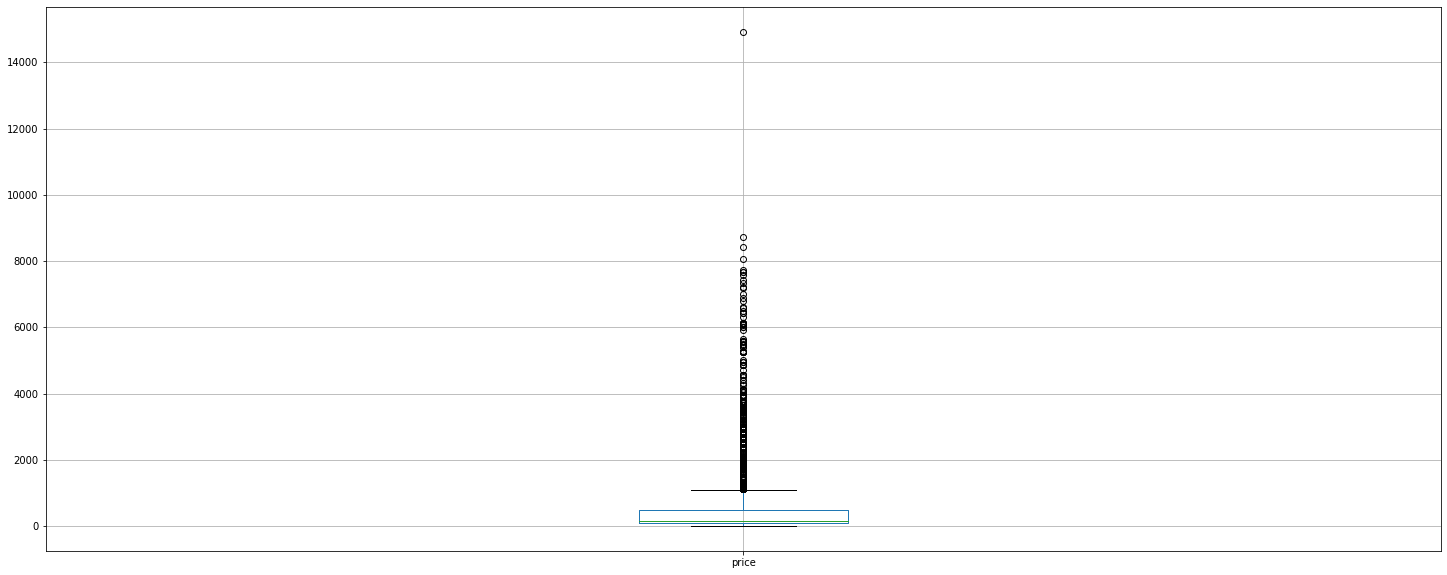

In [32]:
#найдем аномальные, выбивающиеся значения для price
#find abnormal, out-of-order values for price
df.boxplot(column='price', figsize=(25, 10))
plt.show()

In [33]:
#найдем товар с максимальной ценой
#find this product
df[df['price']>9000]

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total
5992,2019-07-29 01:07:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая,1,14917.0,2019-07-01,2019-07-29,7,31,14917.0


Выявленный товар является самым дорогим в датасете. Однако мы не будем избавляться от данного выброса поскольку его влияние на статистические показатели - несущественно. Более того, на данный момент неизвестно как и в каком обьеме данный товар повлиял как на выручку в целом так и не определены категории покупателей, предпочитающие данный товар.
___
The identified product is the most expensive in the dataset. However, we will not get rid of this outlier since its impact on the statistical indicators is insignificant. Moreover, at the moment it is not known how and in what volume this product affected both the revenue in general and the categories of buyers who prefer this product have not been determined.

In [34]:
#посмотрим еще раз на статистическое описание данных по датафрейму
#statistical information
df.describe() 

,order_id,quantity,price,month,week,total
count,4853.000000,4853.000000,4853.000000,4853.00000,4853.000000,4853.000000
mean,48276.524006,2.835154,515.912425,6.51906,26.642695,851.887492
std,27331.718140,17.638558,945.932617,3.29560,14.276553,9827.427522
min,12624.000000,1.000000,9.000000,1.00000,1.000000,9.000000
25%,14774.000000,1.000000,90.000000,4.00000,16.000000,120.000000
50%,68860.000000,1.000000,150.000000,6.00000,23.000000,194.000000
75%,70834.000000,1.000000,502.000000,10.00000,41.000000,734.000000
max,73164.000000,1000.000000,14917.000000,12.00000,52.000000,675000.000000


In [35]:
#найдем максимальную общую сумму по столбцу total
#find the maximum sum by the total column
df[df['total'] == 675000]

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total
5456,2019-06-18 01:05:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, burstenmann, 0522/0000",1000,675.0,2019-06-01,2019-06-18,6,25,675000.0


Так, заказ 71743 представляет собой товар в количестве 1000 штук по цене 675 руб., что вышло на общую сумму 675 000 руб.
По всей видимости это оптовый или "тестовый" заказ.

Правильным будет его не учитывать в анализе.
___
Так, заказ 71743 представляет собой товар в количестве 1000 штук по цене 675 руб., что вышло на общую сумму 675 000 руб.
По всей видимости это оптовые или "тестовые" заказы.

Правильным будет его не принимать в анализ.

In [36]:
#удаляем "тестовый" заказ
#delete the "test" order
df = df.drop(df[df['order_id'] == 71743].index)

In [37]:
#статистическое описание данных по срезу с уменьшенным диапазоном по количеству 
#statistical description of data by slice with reduced range by count
df.describe() 

,order_id,quantity,price,month,week,total
count,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000,4852.000000
mean,48271.687552,2.629637,515.879637,6.519167,26.643034,712.945177
std,27332.458153,10.303631,946.027352,3.295932,14.278005,1700.565592
min,12624.000000,1.000000,9.000000,1.000000,1.000000,9.000000
25%,14774.000000,1.000000,90.000000,4.000000,16.000000,120.000000
50%,68860.000000,1.000000,150.000000,6.000000,23.000000,194.000000
75%,70833.250000,1.000000,491.500000,10.000000,41.000000,734.000000
max,73164.000000,334.000000,14917.000000,12.000000,52.000000,49432.000000


Медианное значение по выручке меньше среднего в два раза. Также видим максимальное количество в размере 334 штук. Вероятно имеет место быть второй "оптовый" заказ. Посмотрим на него.
___
The median value for revenue is less than the average by half. We also see the maximum quantity of 334 pieces. There is probably a second "wholesale" order. Let's look at him.

In [38]:
#найдем товар с максимальным количеством (300) по новому срезу 
#find this product
df[df['quantity']==334]

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total
5071,2019-06-11 00:07:00,146cd9bf-a95c-4afb-915b-5f6684b17444,71668,вешалки мягкие для деликатных вещей 3 шт шоколад,334,148.0,2019-06-01,2019-06-11,6,24,49432.0


Заказ 71668 в количестве 334 штук на товар "вешалки мягкие для деликатных вещей 3 шт шоколад" составил 49 432 руб. в выручке. Как минимум в таком количестве данный заказ мог понадобиться магазину одежны.

Стоит этот закак также отнести к "оптовому", чтобы он также не искажал статистику по обычным, не таким объемным заказам.
___
Order 71668 in the amount of 334 pieces for the product "soft hangers for delicate things 3 pcs chocolate" amounted to 49,432 rubles. in revenue. At least in this quantity, this order could be needed by a clothing store.

This order should also be classified as "wholesale", so that it also does not distort the statistics on ordinary, not so large orders.

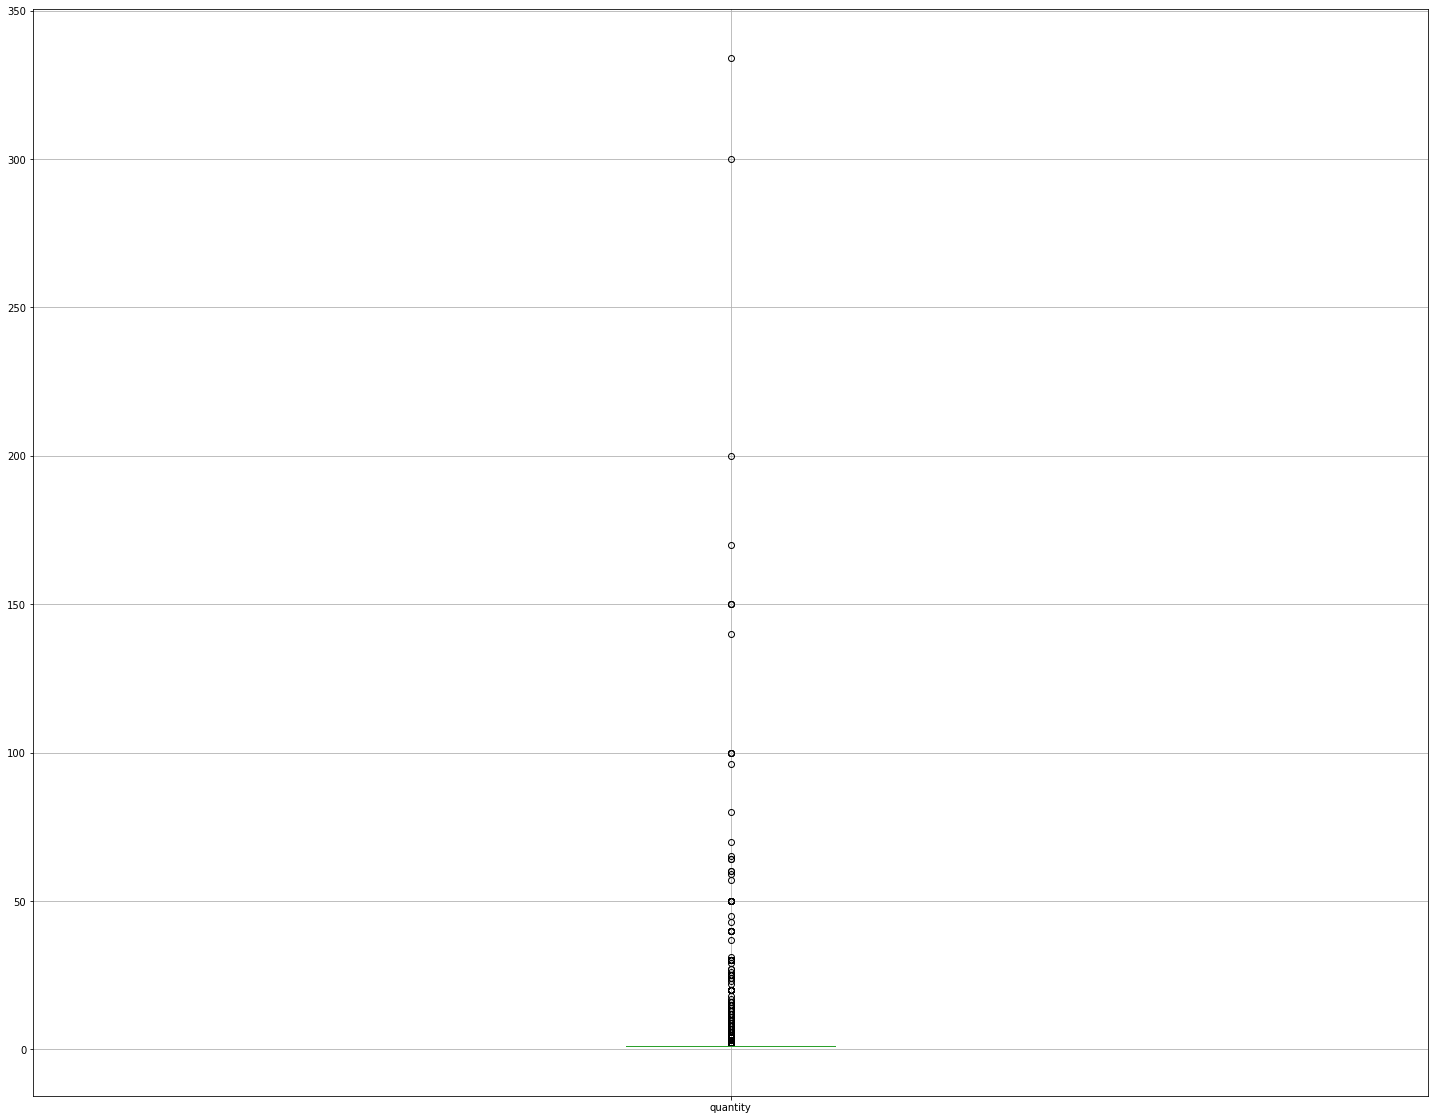

In [39]:
#смотрим выбросы по колонке quantity
#look at the outliers by the quantity column
df.boxplot(column='quantity', figsize=(25, 20))
plt.show()

Наблюдаются также другие выбросы. Например "крупные" заказы от 50 шт. до 300 шт. Посмотрим также и на них.
___
Other outliers are also observed. For example "large" orders from 50 pcs. up to 300 pcs. Let's look at them too.

In [40]:
#посмотрим товары с количеством от 50 до 334 штук
#find this product
df_big = df[(df['quantity'] >= 50) & (df['quantity'] <= 334)]
df_big.sort_values(by='quantity')

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total
2049,2019-02-27 00:09:00,377c8a20-a3e0-4945-9fd8-a1f4ada5d8b0,70482,муляж банан желтый 21 см полиуретан,50,51.0,2019-02-01,2019-02-27,2,9,2550.0
233,2018-10-12 01:05:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68623,"петля приварная гаражная d 14х90 мм с шаром, 1103003",50,38.0,2018-10-01,2018-10-12,10,41,1900.0
6678,2019-10-22 01:06:00,511115b7-e981-4069-9e0e-88a3551341a6,73063,муляж яблоко зеленый 9 см полиуретан,50,51.0,2019-10-01,2019-10-22,10,43,2550.0
1897,2019-02-18 01:06:00,74b08ab4-16e9-4d83-9c31-acfc9d229bc5,70328,муляж лимон желтый 9 см полиуретан,50,51.0,2019-02-01,2019-02-18,2,8,2550.0
281,2018-10-17 01:03:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68668,щетка для посуды *мила* sv3182 1807009,50,27.0,2018-10-01,2018-10-17,10,42,1350.0
282,2018-10-17 01:03:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68668,"щетка-утюжок с ручкой миди, standart, york, g1126",50,44.0,2018-10-01,2018-10-17,10,42,2200.0
6684,2019-10-23 01:01:00,2fac41bf-e800-4bc3-a4b3-0df800f33e99,73073,"ведро резинопластиковое строительное 12,0 л (мп), 1402018",50,64.0,2019-10-01,2019-10-23,10,43,3200.0
1484,2019-01-11 02:02:00,34b2bf7d-7cd8-4aba-909d-396655d77f7e,69793,вешалка valiant для брюк и юбок металлическая 30*10.5 см 121b11,50,94.0,2019-01-01,2019-01-11,1,2,4700.0
1299,2018-12-21 01:06:00,6987e6d6-a63a-4ce2-a2d0-f424092d235e,69504,тележка багажная delta тбр-22 синий грузоподъемность 20 кг сумка и 50 кг каркас россия,57,574.0,2018-12-01,2018-12-21,12,51,32718.0
2598,2019-04-02 00:09:00,aaafc0ca-1fd4-4d0b-b7b8-37391c319fd3,70970,"ковш пластмассовый полимербыт с215, 1,5 л 1406006",59,64.0,2019-04-01,2019-04-02,4,14,3776.0


In [41]:
#посчитаем количество
#count the number
df_big['quantity'].count()

30

Так, выявлено, что каждый из 29 заказов с количеством от 50 до 300 также как и в стучае с заказам  71668 имеет в себе лишь одну позицию. Данные заказы имеют место быть, они не носят разовый характер, а в некоторых случаях они регулярные, например для покупателя 4d93d3f6-8b24-403b-a74b-f5173e40d7db.

Принято решение заказы с количеством от 50 до 334 перевести в категорию "оптовые".

А пока посмотрим на срез без потенциальных "оптовиков" и на распределение статистических показателей.
___
Thus, it was revealed that each of the 29 orders with the quantity from 50 to 300, as well as in knocking with orders 71668, has only one position. These orders take place, they are not one-time, and in some cases they are regular, for example, for the buyer 4d93d3f6-8b24-403b-a74b-f5173e40d7db.

It was decided to transfer orders with a quantity from 50 to 334 to the "wholesale" category.

In the meantime, let's look at the cut without potential "wholesalers" and the distribution of statistical indicators.

In [42]:
#уменьшим диапазон по количеству без "крупных" заказов по количеству
#reduce the range by quantity without "large" orders by quantity
df_small=df[df['quantity'] < 50]

In [43]:
#статистическое описание данных по срезу с уменьшенным диапазоном по количеству до 50 
#statistical description of data by slice with a reduced range in number to 50
df_small.describe() 

,order_id,quantity,price,month,week,total
count,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000,4822.000000
mean,48133.642472,2.009540,518.575695,6.509954,26.601825,670.479469
std,27360.775905,3.662418,948.297481,3.292333,14.263423,1380.881819
min,12624.000000,1.000000,9.000000,1.000000,1.000000,9.000000
25%,14771.000000,1.000000,90.000000,4.000000,16.000000,120.000000
50%,68858.000000,1.000000,150.000000,6.000000,23.000000,190.000000
75%,70820.500000,1.000000,509.000000,10.000000,41.000000,727.000000
max,73164.000000,45.000000,14917.000000,12.000000,52.000000,47385.000000


Видим, что стандартное отклонение по столбцу quantity снизилось с 17 до 3 за счет того, что мы срезали данные с "оптовыми" заказами.

Тот же показатель уменьшился и по столбцу total, однако его среднее значение по цене выше медианного больше чем в 3 раза.

Проверим, один это заказ или нет.
___
We see that the standard deviation for the quantity column has decreased from 17 to 3 due to the fact that we cut off the data with "wholesale" orders.

The same indicator also decreased in the total column, however, its average value at a price higher than the median is more than 3 times.

Let's check if it's one order or not.

In [44]:
#найдем товар с максимальным значением по total
#find this product
df_small[df_small['total']==47385]

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total
1518,2019-01-15 01:03:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,27,1755.0,2019-01-01,2019-01-15,1,3,47385.0


Похоже, что это также оптовый (мелко-оптовый заказ) отнесем его также к оптовым покупателям.
___
It seems that this is also a wholesale (small-wholesale order), we will also refer it to wholesale buyers.

In [45]:
df[df['total'] == 47385.0]

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total
1518,2019-01-15 01:03:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,27,1755.0,2019-01-01,2019-01-15,1,3,47385.0


In [46]:
#добваим в оптовые еще и заказ 69830
#find this product
df_big_add = df[(df['order_id'] == 69830)]
df_big_add

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total
1518,2019-01-15 01:03:00,58a4c3cc-504f-43ea-a74a-bae19e665552,69830,простынь вафельная 200х180 см wellness rw180-01 100% хлопок,27,1755.0,2019-01-01,2019-01-15,1,3,47385.0


In [47]:
#уменьшим диапазон по количеству без "крупных" заказов по количеству
#reduce the range by quantity without "large" orders by quantity
df_final=df_small[df_small['total'] != 47385]

In [48]:
#статистическая информация
#statistical information 
df_final.describe() 

,order_id,quantity,price,month,week,total
count,4821.000000,4821.000000,4821.000000,4821.000000,4821.000000,4821.00000
mean,48129.142087,2.004356,518.319228,6.511097,26.606721,660.78967
std,27361.829057,3.645065,948.228585,3.291718,14.260850,1205.98013
min,12624.000000,1.000000,9.000000,1.000000,1.000000,9.00000
25%,14771.000000,1.000000,90.000000,4.000000,16.000000,120.00000
50%,68858.000000,1.000000,150.000000,6.000000,23.000000,190.00000
75%,70821.000000,1.000000,509.000000,10.000000,41.000000,727.00000
max,73164.000000,45.000000,14917.000000,12.000000,52.000000,24370.00000


Посмотрим, что это за товар с максимальной суммой по столбцу total
___
Let's see what kind of product it is with the maximum amount in the total column

In [49]:
#найдем товар с максимальным значением по total
#find this product
df_final[df_final['total']==24370]

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total
661,2018-11-06 01:02:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"урна уличная ""гео"", hobbyka/хоббика, 59*37,5см, сталь",5,4874.0,2018-11-01,2018-11-06,11,45,24370.0


Количество в 5 штук уже можно не относить к оптовым
___
A quantity of 5 pieces can no longer be classified as wholesale.

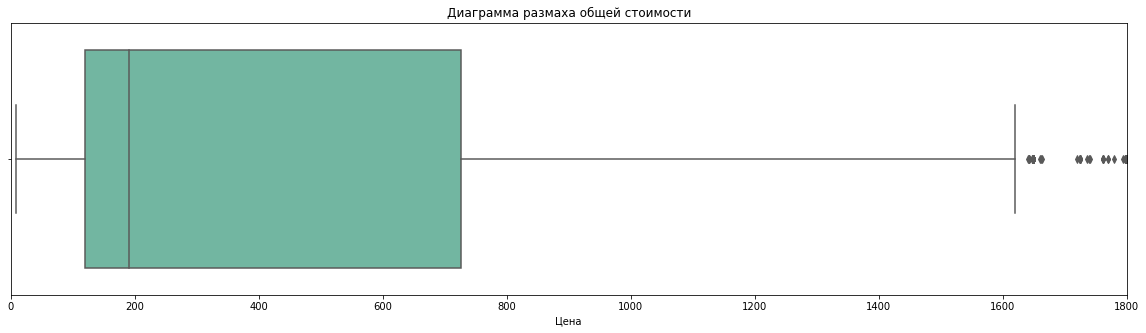

In [50]:
#посмотрим наглядно медианное и среднее значение на диаграмме размаха
#let's see clearly the median and average value on the range chart
plt.figure(figsize=(20, 5))
ax = sns.boxplot(df_final['total'], x='total', palette="Set2")
plt.title('Диаграмма размаха общей стоимости')
plt.xlabel('Цена')
plt.xlim([0, 1800])
plt.show()

Среднее значение по цене выше медианного больше чем в 3 раза, почти в 4. На это влияют заказы с нескольким количеством товаров.
___
The average value at a price higher than the median is more than 3 times, almost 4 times. This is affected by orders with several quantities of goods.

In [51]:
#проверим, имеются ли заказы, относящиеся сразу к нескольким клиентам
#check if there are orders related to several customers at once
multiple_clients = df_final.groupby('order_id')['customer_id'].nunique().sort_values(ascending=False).reset_index()
multiple_clients = multiple_clients[multiple_clients['customer_id'] > 1]['order_id']
multiple_clients.count()

29

Видим, что в 29 заказах присутствуют разные клиенты. Необходимо удалить таких клиентов из заказов.
___
We see that there are different customers in 29 orders. You need to remove such customers from orders.

In [52]:
#удаляем
#delete
df_final.drop(df_final[df_final['order_id'].isin(multiple_clients)].index, axis=0, inplace=True)

In [53]:
#смотрим размерность
#look at the dimension
print("Размерность датафрейма: ", df_final.shape)

Размерность датафрейма:  (4755, 11)


In [54]:
#статистическая информация
#statistical information
df_final.describe()

,order_id,quantity,price,month,week,total
count,4755.000000,4755.000000,4755.000000,4755.000000,4755.000000,4755.000000
mean,47883.283070,1.964879,518.486225,6.509359,26.601682,659.963828
std,27404.775464,3.446299,950.302893,3.290274,14.250992,1209.979236
min,12624.000000,1.000000,9.000000,1.000000,1.000000,9.000000
25%,14770.000000,1.000000,90.000000,4.000000,16.000000,120.000000
50%,68844.000000,1.000000,150.000000,6.000000,23.000000,190.000000
75%,70783.500000,1.000000,502.000000,10.000000,41.000000,727.000000
max,73164.000000,45.000000,14917.000000,12.000000,52.000000,24370.000000


После предобработки наблюдается повынное среднее значение и стандартное отклонение по столбцам quantity и total, что может говорить о нескольких количествах ирваров в некоторых заказах, а также частичных выбросах, которые не попали в категорию "оптовые"
___
After preprocessing, there is an increase in the average value and standard deviation for the quantity and total columns, which may indicate several quantities of irvars in some orders, as well as partial outliers that did not fall into the "wholesale" category

**Вывод**

Столбец date приведен к нужному формату - datetime64.

Также добавлены столбецы 'year_month_day' (с датой вплоть до дня) и month (с указанием месяца)

После приведения столбца product к строчному фомату, количество уникальных значений по нему уменьшилось на 2 единицы. Значит присуствовали неявные дубликаты с разными регистрами.

При изучении неявных дубликатов определено, что, например заказ 68474 был оформлен на одного и того же покупателя на одну и ту же сумму 3 раза, но на разную дату: дважды на 2018-10-02 и повторно на дату 2018-10-03. Получается, что имеются дубликаты также по разным датам. 

Вероятно имеет место быть техническая ошибка или данные выгружены некорректно. Принимаем решение оставить последние по дате заказы, а предыдущие дубли (почти 28%) - удалить, поскольку они могут некорректно повлиять на анализ покупательской активности. 

Тем самым мы уменьшили датафрейм на количество неявных дубликатов - вместо 6737 строк стало 4853.

Выявлен самый дорогой товар в датасете. Однако мы не будем избавляться от данного выброса поскольку его влияние на статистические показатели - несущественно. Более того, на данный момент неизвестно как и в каком обьеме данный товар повлиял как на выручку в целом так и не определены категории покупателей, предпочитающие данный товар.

Что касается заказа 71743, представляющего собой товар в количестве 1000 штук по цене 675 руб., что вышло на общую сумму 675 000 руб.
Это "тестовый" заказ и принято решение его не учитывать. 

Также выявлено еще 30 заказов с количеством от 50 до 334 штук. Как и в стучае с заказом 71743 они имеют в себе лишь одну позицию. Данные заказы имеют место быть, они не носят разовый характер, а в некоторых случаях они регулярные, например для покупателя 4d93d3f6-8b24-403b-a74b-f5173e40d7db. Принято решение заказы с количеством от 25 до 1000 перевести в категорию "оптовые".

Анализ данных без потенциальных "оптовиков" уменьшил распределение таких статистических показателей как среднее и стандартное отклонение. Так, например, стандартное отклонение по столбцу quantity снизилось с 17 до 4.

Более того, были выявлены заказы, в которых присутствует несколько покупателей. Видимо имеет место быть какая-то техническая ошибка. Например, покупатель возвращался повторно и ему присваивался новый id. Принято решение их удалить.

В итоге, датафрейм, без учета дубликатов и оптовых покупателей составил 4755 строк.
___
**Conclusion**

The date column has been converted to the correct format, datetime64.

Also added 'year_month_day' (with date up to day) and month (with month) columns

After converting the product column to a string format, the number of unique values ​​for it decreased by 2 units. So there were implicit duplicates with different registers.

When studying implicit duplicates, it was determined that, for example, order 68474 was placed for the same customer for the same amount 3 times, but on a different date: twice on 2018-10-02 and again on the date 2018-10-03. It turns out that there are duplicates also on different dates.

Probably there is a technical error or the data was uploaded incorrectly. We make a decision to leave the latest orders by date, and delete the previous duplicates (almost 28%), since they may incorrectly affect the analysis of purchasing activity.

Thus, we reduced the dataframe by the number of implicit duplicates - instead of 6737 rows, it became 4853.

The most expensive item in the dataset has been identified. However, we will not get rid of this outlier since its impact on the statistical indicators is insignificant. Moreover, at the moment it is not known how and in what volume this product affected both the revenue in general and the categories of buyers who prefer this product have not been determined.

As for order 71743, which is a product in the amount of 1000 pieces at a price of 675 rubles, which came out to a total amount of 675,000 rubles.
Apparently this is a wholesale or "test" order. Also, another 30 orders were identified with quantities ranging from 50 to 334 pieces. As in knocking with order 71743, they have only one position. These orders take place, they are not one-time, and in some cases they are regular, for example, for the buyer 4d93d3f6-8b24-403b-a74b-f5173e40d7db. It was decided to transfer orders with quantities from 50 to 1000 to the "wholesale" category.

Analysis of the data without potential "wholesalers" reduced the distribution of such statistical indicators as the mean and standard deviation. So, for example, the standard deviation for the quantity column has dropped from 17 to 4.

Moreover, orders were identified in which there are several buyers. There seems to be some kind of technical error. For example, the buyer returned again and was assigned a new id. The decision was made to remove them.

As a result, the dataframe, excluding duplicates and wholesale buyers, amounted to 4755 rows.

# **Шаг 3 "Исследовательский анализ данных (EDA)"** <a id='intro_3'></a>
 
* подсчет уникальных пользователей
* определить минимальную и максимальные даты
* подсчет количества заказов в день, неделю, месяц, сезон (3 месяца)
* определение общего количества заказов, а также максимальных, минимальных и средних заказов (в месяц);
* подсчет выручки
* определить средний чек на покупателя
* определить периодичность заказов
* выделение категорий товаров (часто встречающиеся)
* выделение топ-товаров и антитоп-товаров
* подсчет “постоянных” клиентов
___
**Step 3 "Exploratory Data Analysis (EDA)"**
 
* unique users count
* define minimum and maximum dates
* counting the number of orders per day, week, month, season (3 months)
* determination of the total number of orders, as well as maximum, minimum and average orders (per month);
* revenue calculation
* determine the average check per customer
* determine the frequency of orders
* selection of product categories (frequently occurring)
* selection of top products and anti-top products
* counting "regular" customers

___
**Подсчет уникальных пользователей**

In [55]:
#cчитаем уникальное количество покупателей по столбцу customer_id
#look at the unique values by the customer_id column
unique_customers = df_final['customer_id'].nunique()
print("Уникальных покупателей:", unique_customers)

Уникальных покупателей: 2371


___
**Определение минимальной и максимальной дат / Determining the minimum and maximum dates**

In [56]:
profiles_min = df_final.agg({'date': ['min']})
print('минимальная дата заказа покупателя', profiles_min.head())

минимальная дата заказа покупателя           date
min 2018-10-01


In [57]:
profiles_max = df_final.agg({'date': ['max']})
print('максимальная дата заказа покупателя', profiles_max.head())

максимальная дата заказа покупателя                    date
max 2019-10-31 01:06:00


___
**Подсчет количества заказов в день, неделю, месяц, сезон (3 месяца) / Counting the number of orders per day, week, month, season (3 months)**

Подсчитываем количество заказов **в день** / Counting the number of orders **per day**

In [58]:
df_final.groupby(['year_month_day']).agg({'order_id': 'nunique'})

,order_id
year_month_day,
2018-10-01,8
2018-10-02,14
2018-10-03,8
2018-10-04,11
2018-10-05,6
...,...
2019-10-27,2
2019-10-28,7
2019-10-29,3


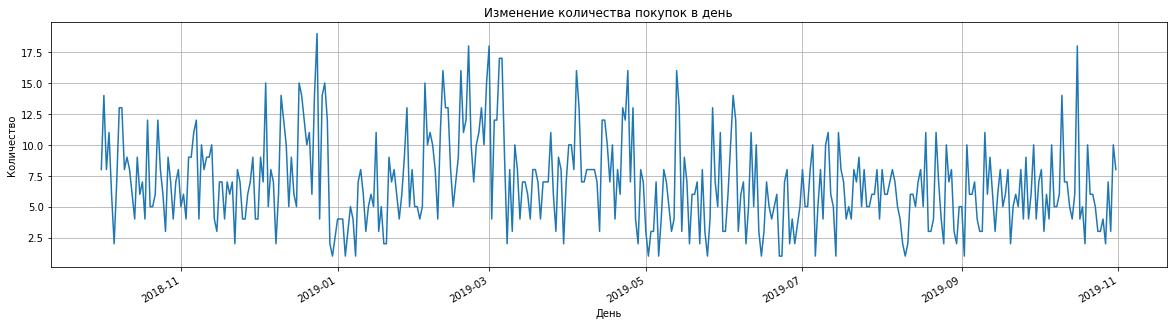

In [59]:
#группируем количество покупок в день и визуализируем
#group the number of purchases per day and visualize
df_final.groupby(['year_month_day']).agg({'order_id': 'nunique'}) \
      .plot(grid=True, legend=False, figsize=(20, 5))
plt.title('Изменение количества покупок в день')
plt.xlabel('День')
plt.ylabel('Количество');

Наблюдаются нарастающие тренды по увеличению количества покупок к январю, к марту и ноябрю. Конкретные даты в таком виде интерпретировать сложно.
___
There are growing trends to increase the number of purchases by January, March and November. Specific dates in this form are difficult to interpret.

Подсчитываем количество заказов **в неделю** / Counting the number of orders **per week**

In [60]:
df_final.groupby(['week']).agg({'order_id': 'nunique'})

,order_id
week,
1,17
2,34
3,34
4,49
5,45
6,69
7,71
8,83
9,83


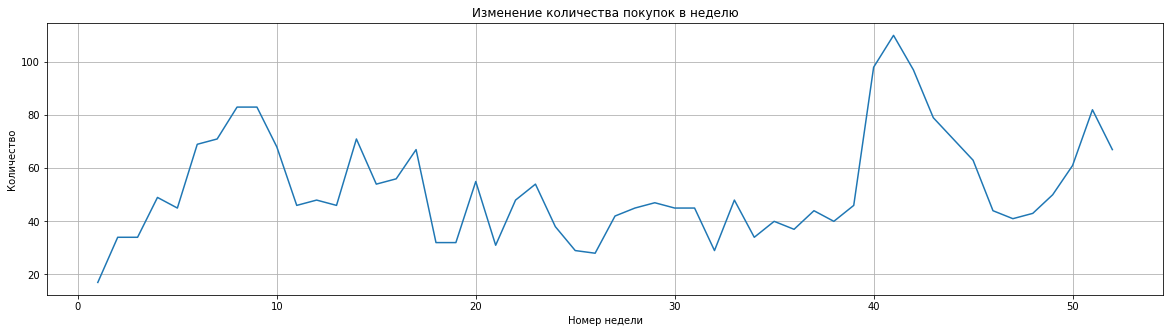

In [61]:
#группируем количество покупок в неделю и визуализируем
#group the number of purchases per week and visualize
df_final.groupby(['week']).agg({'order_id': 'nunique'}) \
      .plot(grid=True, legend=False, figsize=(20, 5))
plt.title('Изменение количества покупок в неделю')
plt.xlabel('Номер недели')
plt.ylabel('Количество');

Пиковое значение явно просматривается на 41 неделе.
___
The peak value is clearly visible at 41 weeks.

Подсчитываем количество заказов **в месяц** / Calculate the number of orders **per month**

In [62]:
df_final.groupby(['month']).agg({'order_id': 'nunique'})

,order_id
month,
1,165
2,284
3,242
4,262
5,174
6,158
7,197
8,173
9,176


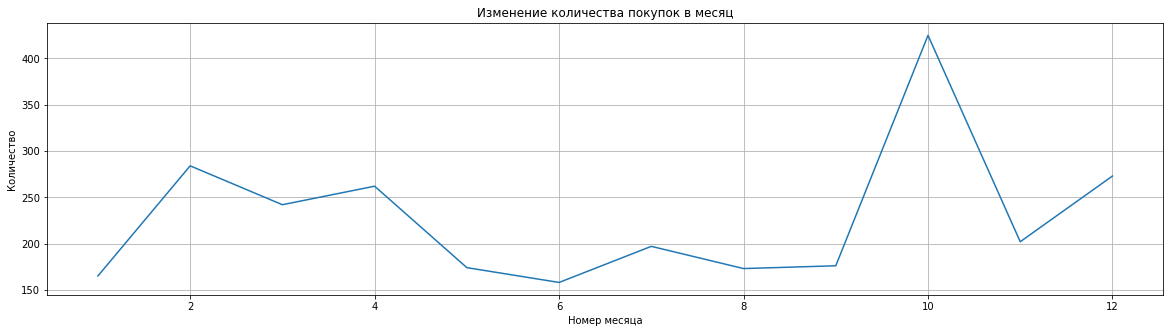

In [63]:
#группируем количество покупок в месяц и визуализируем
#group the number of purchases per month and visualize
df_group_month = df_final.groupby(['month']).agg({'order_id': 'nunique'})
df_group_month.plot(grid=True, legend=False, figsize=(20, 5))
plt.title('Изменение количества покупок в месяц')
plt.xlabel('Номер месяца')
plt.ylabel('Количество');

41 неделя пришлась на август 2019 года. Пиковое значение в октябре могло быть задвоено за счет октября 2018 года и октября 2019 года, так как на графике по дням не наблюдается каких-либо пиковых значений в октябре. Проверим это.
___
Week 41 fell on August 2019. The October peak may have been doubled by October 2018 and October 2019 as the daily chart does not show any October peaks. Let's check it out.

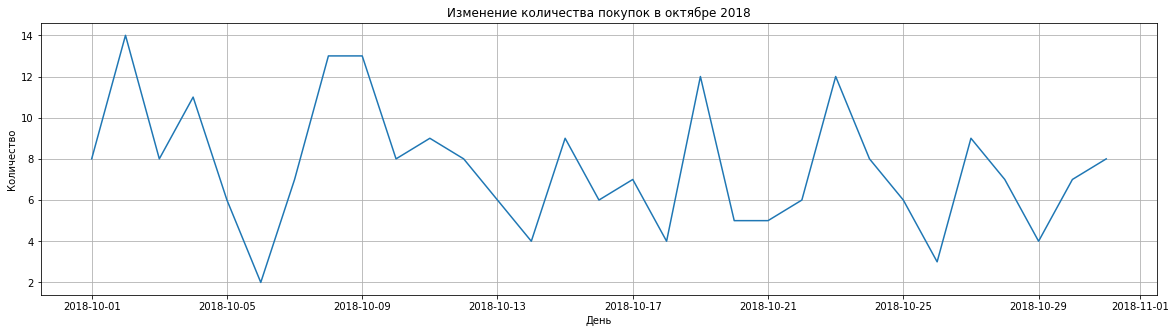

Сумма покупок в октябре 2018: 235


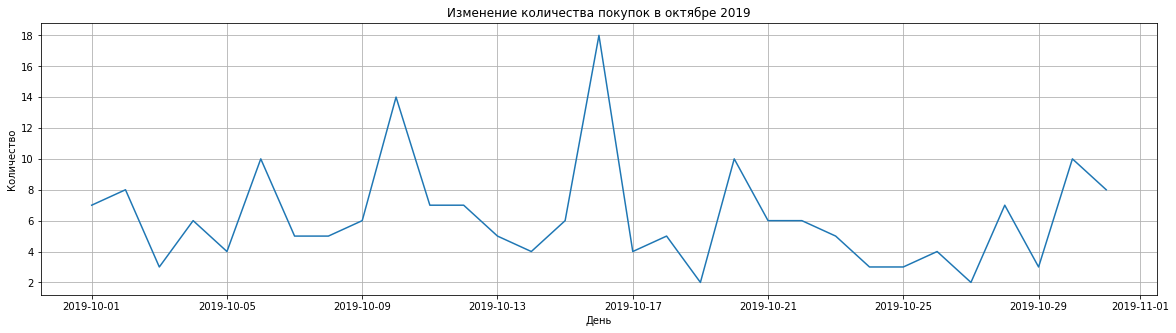

Сумма покупок в октябре 2019: 193
Сумма покупок в октябре за 2018 и 2019: 428


In [64]:
#группируем количество покупок в день и визуализируем
#group the orders by day and count the number of unique orders
daily= df_final.groupby(df_final['year_month_day'].dt.date).agg({'order_id': 'nunique'})


#отфильтруем данные, чтобы показать только даты, начинающиеся с 20 10 2018.
#filter the data to show only dates starting from 2018-10-20
start_date = pd.Timestamp('2018-10-31')
daily_2018 = daily[daily.index <= start_date.date()]

#построим данные
#plot the data
daily_2018.plot(grid=True, legend=False, figsize=(20, 5))
plt.title('Изменение количества покупок в октябре 2018')
plt.xlabel('День')
plt.ylabel('Количество')
plt.show()
print("Сумма покупок в октябре 2018:", daily_2018['order_id'].sum())

start_date_2 = pd.Timestamp('2019-10-01')
end_date= pd.Timestamp('2019-10-31')
daily_2019 = daily[(daily.index >= start_date_2.date()) & (daily.index <= end_date.date())]


#построим данные
#plot the data
daily_2019.plot(grid=True, legend=False, figsize=(20, 5))
plt.title('Изменение количества покупок в октябре 2019')
plt.xlabel('День')
plt.ylabel('Количество')
plt.show()
print("Сумма покупок в октябре 2019:", daily_2019['order_id'].sum())
print("\33[1mСумма покупок в октябре за 2018 и 2019:", daily_2018['order_id'].sum() + daily_2019['order_id'].sum())

Действительно, пиковое значение в октябре задвоено за счет октября 2018 года и октября 2019 года, что в сумме составляет 428.

Поэтому на графике "Изменение количества покупок в месяц" мы наблюдаем точку максимума на уровне значения 428.
___
Indeed, the October peak is doubled by October 2018 and October 2019, for a total of 428.

Therefore, on the "Change in the number of purchases per month" chart, we observe a maximum point at the level of 428.

___
**Определение общего количества заказов, а также максимальных, минимальных и средних заказов (в месяц)**
___
Determining the total number of orders, as well as the maximum, minimum and average orders (per month)

In [65]:
print("Максимальное количество заказов / Max:")
df_group_month.max()

Максимальное количество заказов / Max:


order_id    425
dtype: int64

In [66]:
print("Минимальное количество заказов / Min:")
df_group_month.min()

Минимальное количество заказов / Min:


order_id    158
dtype: int64

In [67]:
avg_orders_per_month = df.groupby('month')['order_id'].nunique().mean()
print("Среднее количество заказов в месяц / Average:")
avg_orders_per_month

Среднее количество заказов в месяц / Average:


233.0

___
**Подсчет выручки** / **Revenue calculation**

In [68]:
#подсчет выручки по месяцам 
#revenue calculation per month
df_final_total = df_final.groupby(['year_month_day']).agg({'total': 'sum'})
df_final_total

,total
year_month_day,
2018-10-01,4613.0
2018-10-02,16746.0
2018-10-03,10574.0
2018-10-04,25170.0
2018-10-05,4036.0
...,...
2019-10-27,402.0
2019-10-28,3451.0
2019-10-29,642.0


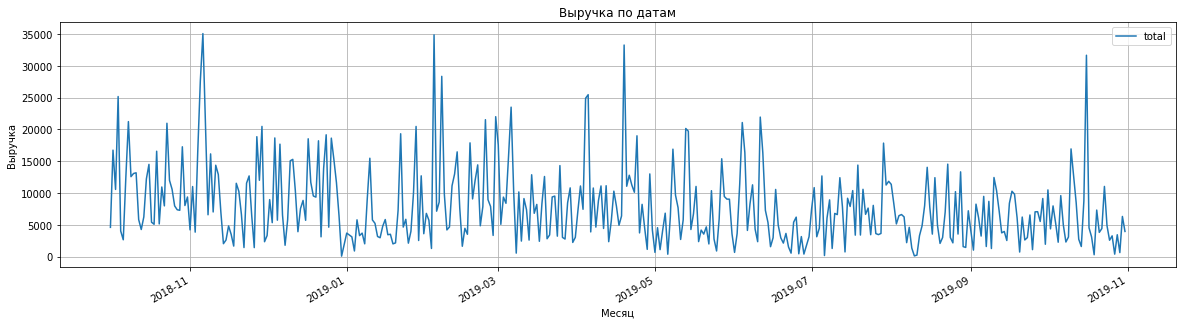

In [69]:
#визуализируем
#visualization
df_final_total.plot(grid=True, figsize=(20, 5))
plt.title('Выручка по датам')
plt.xlabel('Месяц')
plt.ylabel('Выручка');

Пиковые значения выручки наблюдаются в ноябре, феврале, апреле и октябре. Похоже, что это сезонность.
___
Peak revenues are observed in November, February, April and October. It seems to be seasonal.

___
**Определим средний чек на покупателя** / **Determine the average check per buyer**

In [70]:
#создадим переменную среднего чека в каждом месяце
#create an average check variable for each month
average_check = df_final.groupby(['month']).agg({'total':'sum','customer_id':'nunique'}).reset_index()
average_check['average_check'] = average_check['total'] / average_check['customer_id']
average_check

,month,total,customer_id,average_check
0,1,178788.0,150,1191.920000
1,2,299346.0,242,1236.966942
2,3,246537.0,227,1086.066079
3,4,300886.0,234,1285.837607
4,5,211974.0,160,1324.837500
5,6,184192.0,149,1236.187919
6,7,226361.0,185,1223.572973
7,8,180910.0,165,1096.424242
8,9,169762.0,169,1004.508876
9,10,524986.0,340,1544.076471


In [71]:
#создадим переменную среднего чека в каждую дату
##create an average check variable for each date
average_check_2 = df_final.groupby(['year_month_day']).agg({'total':'sum','customer_id':'nunique'}).reset_index()
average_check_2['average_check'] = average_check['total'] / average_check['customer_id']
average_check_2

,year_month_day,total,customer_id,average_check
0,2018-10-01,4613.0,8,1191.920000
1,2018-10-02,16746.0,11,1236.966942
2,2018-10-03,10574.0,7,1086.066079
3,2018-10-04,25170.0,10,1285.837607
4,2018-10-05,4036.0,6,1324.837500
...,...,...,...,...
388,2019-10-27,402.0,2,NaN
389,2019-10-28,3451.0,7,NaN
390,2019-10-29,642.0,2,NaN
391,2019-10-30,6325.0,9,NaN


In [72]:
average_check.mean()

month                 6.500000
total            261510.666667
customer_id         201.666667
average_check      1280.085479
dtype: float64

In [73]:
average_check_2.mean()

total            7985.058524
customer_id         6.559796
average_check    1280.085479
dtype: float64

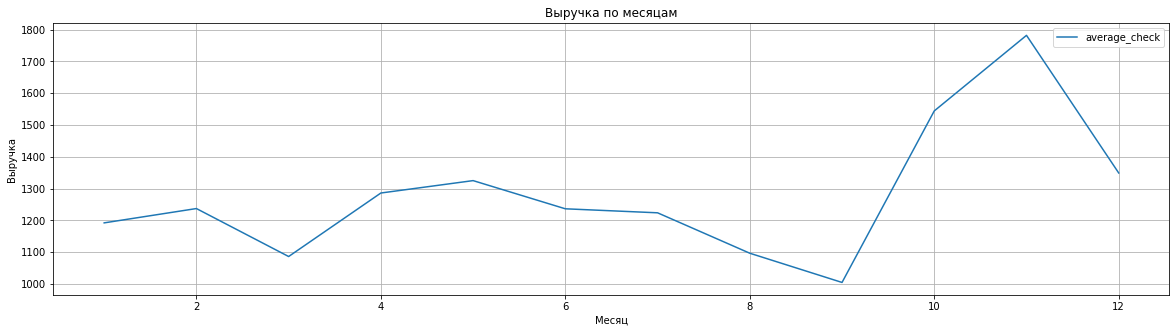

In [74]:
#визуализация среднего чека по месяцам
#visualization average check per months
average_check.plot(y='average_check', x='month', grid=True, figsize=(20, 5))
plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка');

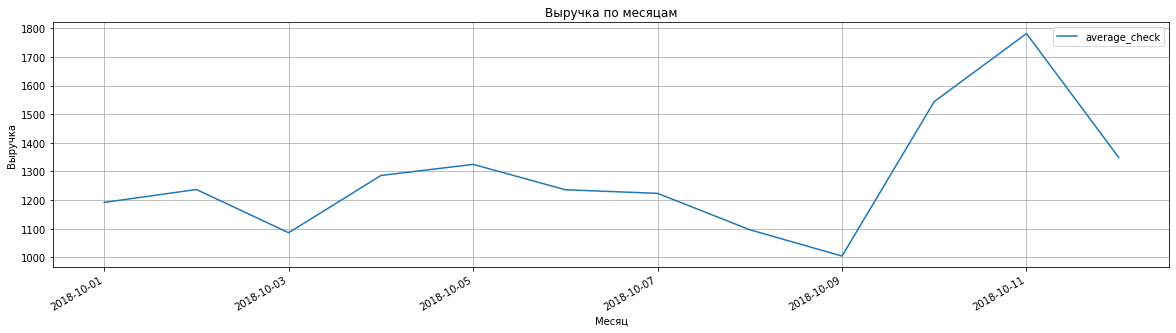

In [75]:
#визуализация среднего чека по дням
#visualization average check per days
average_check_2.plot(y='average_check', x='year_month_day', grid=True, figsize=(20, 5))
plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка');

In [76]:
#средний
#average
average_check_2['average_check'].max()

1781.784090909091

Максимальный средний чек за весь период в ноябре 2019 года, что говорит о том, что было приобретено что-то дорогостоящее, так как нет максимального значения по количеству покупок в этом месяце по сравнению с доугими. Но тем не менее, это сезонный месяц и в нем наблюдаюься пиковые значения по выручке. 

Средний чек в месяц с учетом максимума -  1781,78.
____
The maximum average check for the entire period in November 2019, which indicates that something expensive was purchased, since there is no maximum value for the number of purchases this month compared to the others. But nevertheless, this is a seasonal month and peaks in revenue are observed in it.

The average check per month, taking into account the maximum, is 1781.78.

___
**Выделение категорий товаров (часто встречающиеся)** / **Highlighting product categories (frequently occurring)**

In [77]:
#разделим наименование товара и отберем в список
#separate the name of the product and select it in the list
df_final['name'] = df_final['product'].str.split(" ")
df_final['name'] = df_final['name'].apply(lambda x: x[0])
df_final.head(3)

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total,name
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018-10-01,10,40,142.0,комнатное
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-01,2018-10-01,10,40,194.0,комнатное
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10-01,10,40,112.0,радермахера


In [78]:
#выведем наименования, которые надо распределить:
#display the names that need to be distributed:
sorted(df_final['name'].unique())

['tepмокружка',
 'автоматическая',
 'агератум',
 'адиантум',
 'азалия',
 'аквилегия',
 'алиссум',
 'алоэ',
 'альбука',
 'амариллис',
 'анемона',
 'антижир',
 'антинакипин',
 'антуриум',
 'аптения',
 'арбуз',
 'аргирантерум',
 'ароматизированное',
 'артемизия',
 'аспарагус',
 'астра',
 'афеляндра',
 'бадан',
 'базилик',
 'бак',
 'баклажан',
 'бакопа',
 'бальзам',
 'бальзамин',
 'банка',
 'барвинок',
 'бархатцы',
 'бегония',
 'бельевые',
 'бензин',
 'бидон',
 'блюдо',
 'блюдце',
 'буддлея',
 'бузульник',
 'бульонница',
 'ваза',
 'вакуумный',
 'валериана',
 'ванна',
 'вантуз',
 'ведро',
 'веник',
 'венчик',
 'вербейник',
 'вербена',
 'веревка',
 'вероника',
 'весы',
 'вешалка',
 'вешалка-перекладина',
 'вешалка-плечики',
 'вешалка-стойка',
 'вешалка-сушилка',
 'вешалки',
 'вигна',
 'вилка',
 'виола',
 'вкладыши',
 'газания',
 'гайлардия',
 'гардения',
 'гвоздика',
 'георгина',
 'герань',
 'гербера',
 'гиацинт',
 'гимнокалициум',
 'гиностемма',
 'гипоаллергенный',
 'гипсофила',
 'гладильна

In [79]:
#создадим списки категорий
#create lists of categories
cat = {  
    'Товары для дома и кухни': ['штора', 'штор', 'скатерть', 'пододеяльник', 'подушка','покрывало', 'новогоднее', 'подарочный', 'ваза',
            'фоторамка', 'белье', 'двуспальное','постельное', 'ковер', 'кольца', 'махровое','халат', 'ковров',
            'наволочка', 'наматрасник', 'одеяло', 'плед', 'подкладка', 'чехол','простыня', 'простынь', 'наматрацник',
            'пододеяльник''кухн', 'тарелка', 'нож', 'салатник', 'чайник', 'банка', 'салфетка', 'рыбочистка',
            'термостакан', 'котел', 'салфетница', 'рассекатель', 'дуршлаг', 'бульонница', 'скалка', 'тортница', 
            'сотейник', 'отделитель', 'сахарница', 'половник', 'бидон','блюдо','блюдце','вилка','разделочная',
            'емкость','жестяная','измельчитель', 'картофелемялка','кастрюля','кипятильник','кисточка','хлебница','интерьерный',
            'кружка', 'крышка', 'кувшин', 'кухонное','кухонные','столов','чайная','холодца','мантоварка',
            'пароварка','масленка','мерный','стакан','миксер','мини-сковорода','мирт','миска','модульная', 
            'бокалов','для пикника', 'фужер', 'ножеточка','овощеварка','овощечистка', 'просеиватель','противень','сковорода',
            'скребок','соковарка','соковыжималка', 'стеклянная','тepмокружка', 'терка', 'термокружка','толкушка',
            'фал капроновый','форма','ложка','электроштопор','сито', 'подставка для яйца', 'орехоколка',
            'кухонных полотенец', 'чайный', 'кексов', 'пресс для чеснока', 'кофе арабика', 'кружек для пива', 'термос',
            'венчик', 'набор посуды', 'придверный', 'вешалка', 'вешалок', 'одежда', 'крючок', 'фиксатор-шар', 'ключница', 
            'вакуумный', 'весы', 'вешалки','вкладыши','короб','коробка','кофр', 'обувная','лоток','мусора',
            'монетчатый','мусорный', 'плечики','полки','решетка','складная','стеллаж', 'урна','этажерка','ящик', 
            'подставка','комод','пуф','обувниц','светиль','фото', 'для обув','защитный','обувница','обуви',
            'светильник', 'доска', 'гладильн', 'ванн', 'влаговпитывающий', 'туалета', 'таз', 'щетка', 'настенная',
            'ведр', 'насадка', 'прищепки','веник', 'прищепок','губка','защитная','соль', 'контейнер','швабре', 
            'перчатки','швабр','совок','глажен','налет', 'сушилк','подрукавник','совком', 'тряпка','корзина', 'корыто',  
            'вантуз', 'сменный','дозатор', 'окномойка', 'ёрш', 'ерш', 'держатель', 'запасная', 'коврик', 
            'ковш', 'мыльница', 'подголовник', 'пробка','унитаза', 'тряпкодержатель', 'полотенце', 'полотенец', 
            'махровых салфеток', 'нетканые салфетки', 'ткань универсальная', 'муляж', 'искусственный', 'искусственная'],
        
    'Бытовая химия и косметика': ['ополаскиватель', 'антинакипин', 'ароматизирован', 'гель', 'увлажняющая', 'маска',
            'кондиционер', 'стирки', 'мытья', 'пена', 'антижир','крем', 'для чистки','мыть', 'средство', 'мойк', 
            'покрытие', 'чистящий','чистки', 'отбеливатель', 'стиральный', 'зубная','мыло','жидкое','мыло-скраб',],
    
    'Бытовая техника': ['фен дорожный', 'чайник', 'кондиционер', 'мантоварка', 'пылесос', 'фен', 'утюг','мультиварка',
            'измельчитель', 'кипятильник', 'миксер', 'овощеварка', 'электроштопор'],
    
    'Домашние растения': [ 'декоративная', 'комнатное растение', 'комнатное', 'домашняя', 'укорененный', 'h30', 'h-25',
            'h-20', 'd-5', 'd-7', 'd-9', 'd-14', 'd-17', 'зональная'],
    
    'Товары для сада и дачи': ['рассада', 'томат', 'сумка', 'помидор', 'пеларгония', 'роза', 'петуния', 
            'раннеспелый', 'капуста', 'садовый', 'герань', 'огурец', 'мята', 'фуксия', 'примула', 'калибрахоа', 'тимьян', 
            'цикламен', 'флокс', 'цинния', 'калатея', 'мимоза стыдливая', 'глоксиния', 'афеляндр', 'кореопсис', 'цинерария', 
            'диффенбахий', 'диффенбахия', 'эхинокактус', 'лилейник высокорослый', 'гиацинт', 'фатсия', 'каллуна', 'капсикум', 
            'соланум', 'подсолнечник', 'алоэ', 'аптения', 'кодонант', 'укроп', 'смолевка', 'вербейник', 
            'эхинацея', 'папоротник', 'платикодон', 'энотера', 'цитрофортунелла', 'пеперомия', 'синнингия', 'пиретрум', 
            'драцена', 'гайлардия', 'нивянник', 'физостегия', 'лавр', 'вигна', 'хамедорея', 'настурция', 'а патио',
            'адиантум','азалия','аквилегия','алиссум','амариллис','альбука','андесса', 'арбуз','артемизия','аспарагус',
            'астра','бадан','базилик','баклажан', 'бакопа','бальзам','барвинок','бархатцы','бегония','буддлея', 'бузульник', 
            'валериана', 'вербена', 'виола', 'газания', 'гвоздика','гардения', 'георгина', 'гербера', 'гимнокалициум', 
            'гиностемма', 'гипсофила','годеция','горох','гортензия', 'декабрист', 'декоративная','дендробиум', 'джункус', 
            'томата', 'дыня', 'ель', 'чабер', 'замиокулькас', 'зверобой', 'земляника', 'змееголовник', 'импатиенс','иссоп',
            'сантолина', 'кабачок', 'каланхое', 'календула', 'калла', 'калоцефалус', 'камнеломка','кампанула', 'кипарисовик', 
            'клен', 'клубника', 'колокольчик', 'растение', 'кориандр','космея', 'крассула', 'крокусы','лаванда', 'лантана', 
            'лапчатка','лен', 'литопс', 'порей', 'львиный', 'зев','любисток','мединилла','мелисса','многолетнее', 'молодило',
            'петрушка', 'незабудка','нолина','однолетнее', 'осина', 'патиссон','пахира', 'подвесное', 'цветов','портулак', 
            'пуансеттия','радермахера', 'розмарин','рудбекия','скиммия', 'спатифиллум','суккулент','сциндапсус', 'тюльпан', 
            'ранункулус','тыква', 'фаленопсис','фиалка', 'фикус', 'фиттония', 'хризантема', 'целозия', 'шалфей','эвкалипт',
            'эпипремнум', 'эхеверия', 'эшшольция', 'ясколка', 'шеффлера', 'хризолидокарпус', 'циперус', 'юкка нитчатая', 
            'нефролепис', 'овсянница сизая серый', 'хлорофитум', 'мускари', 'котовник', 'антуриум', 'душица', 'пуансетия',
            'морковь детская', 'девичий виноград', 'лобелия', 'муррайя', 'вероника колосковая', 'хоста', 'монарда',
            'пряные травы', 'солидаго', 'лаватера', 'анемона', 'табак', 'салат рукола', 'лопатка', 'термометр'],
  
                                           
    'Ремонт и строительство': ['стремянка', 'сметка', 'скребок', 'веревка полипропиленовая', 'засор', 'инструмент','сверел','сверло',
            'напильник','стремянк','стяжк','шпингалет','сварка', 'крепеж','карниз', 'пружин','петл','линейк', 
            'паста для полировки', 'бензин','завертка','лестница', 'лестница-стремянка', 'линейка','шнур','строительного',
            'многофункциональный','прецизионных', 'пьезозажигалка', 'ручка','седум','сетка','сметка','стяжка',
            'уголок','фарфоровая','шило','шпагат','штангенциркуль', 'основание для пробки',
            'хозяйственная', 'строительное', 'уличная'],
    
    'Тележки': ['тележка', 'тележ', 'хозяйственная'] 
}

In [80]:
#пропришем функцию, которая на основании данных из столбца product сформирует новый столбец product_category, 
#в который войдут следующие категории:

#let's ask a function that, based on the data from the product column, will form a new product_category column, 
#which will include the following categories:
def categories(goods): 
    for category, items in cat.items():
        for item in items:
            if item in goods:
                return category
    return 'Другие'

In [81]:
df_final['cat_product'] = df_final['product'].apply(categories)
df_final.cat_product.value_counts()

Товары для дома и кухни      1887
Товары для сада и дачи       1758
Домашние растения             968
Ремонт и строительство         82
Бытовая химия и косметика      35
Тележки                        19
Бытовая техника                 6
Name: cat_product, dtype: int64

In [82]:
df_final.head()

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total,name,cat_product
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018-10-01,10,40,142.0,комнатное,Домашние растения
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-01,2018-10-01,10,40,194.0,комнатное,Товары для дома и кухни
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10-01,10,40,112.0,радермахера,Домашние растения
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018-10-01,10,40,179.0,хризолидокарпус,Домашние растения
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018-10-01,10,40,112.0,циперус,Домашние растения


In [83]:
df_final_share = df_final.groupby('cat_product').total.sum().sort_values(ascending=False) / df_final.total.sum() * 100
df_final_share

cat_product
Товары для дома и кухни      59.074869
Товары для сада и дачи       29.269552
Домашние растения             6.472617
Ремонт и строительство        3.742263
Бытовая химия и косметика     0.733048
Тележки                       0.506321
Бытовая техника               0.201330
Name: total, dtype: float64

Были сформированы и распределены следующие категориии:

* Бытовая техника
* Тележки
* Бытовая химия и косметика 
* Ремонт и строительство
* Домашние растения 
* Товары для сада и дачи 
* Товары для дома и кухни 
___
The following categories were formed and distributed:

* Appliances
* Carts
* Household chemicals and cosmetics
* Repair and construction
* House plants
* Goods for the garden and cottages
* Home and Kitchen Products

In [84]:
#перевожу series в датафрейм
#converting a series to a DataFrame
df_final_share = df_final_share.to_frame().reset_index()

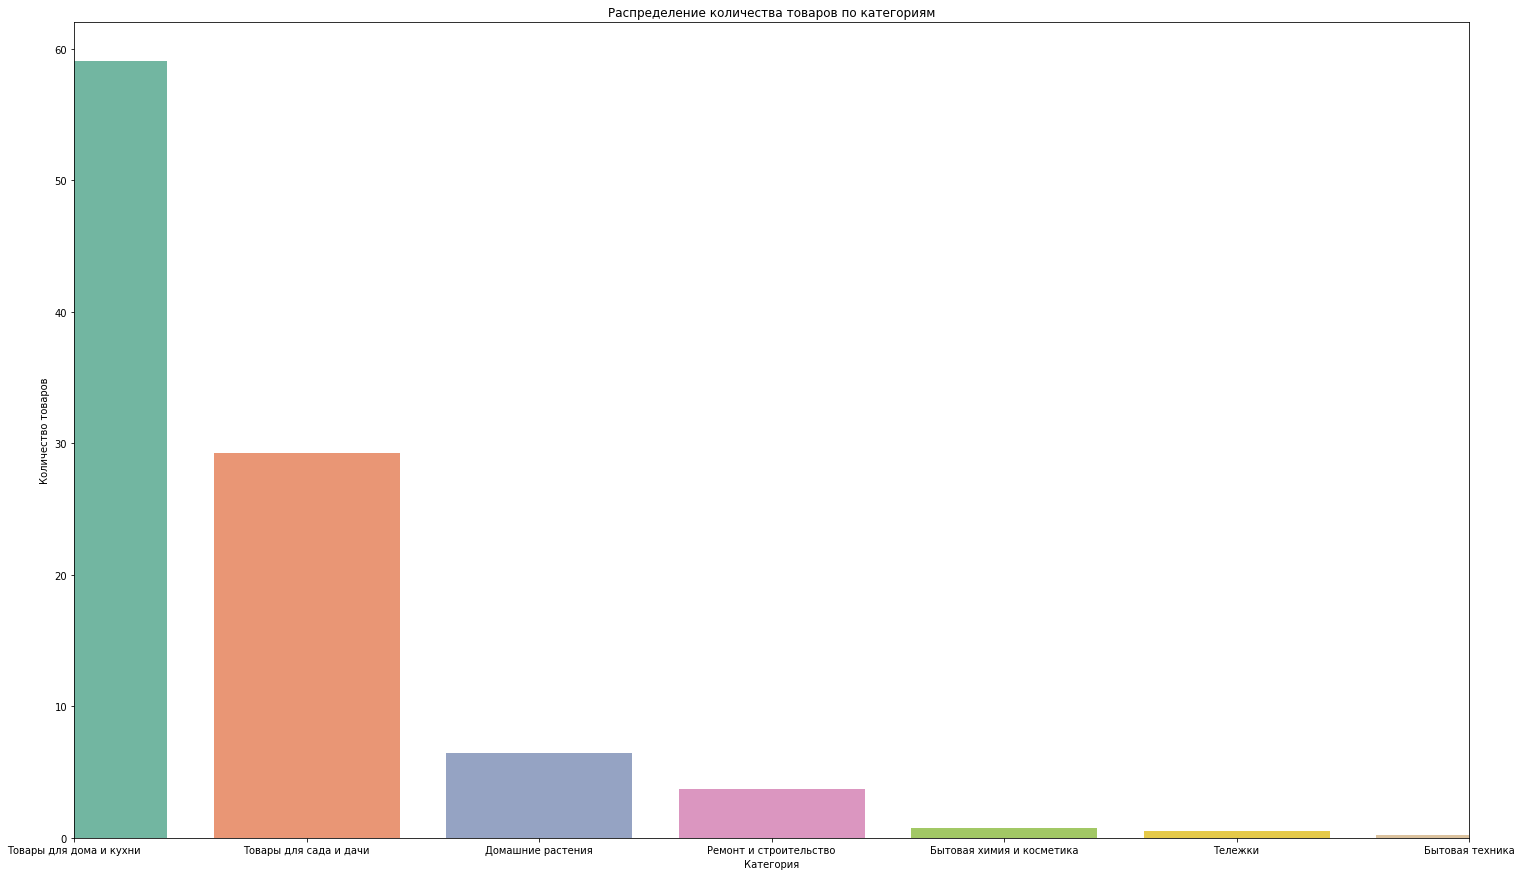

In [85]:
#производим сортировку
#sorting
median_df_quantity = df_final_share.groupby('cat_product')['total'].median().reset_index().sort_values(by='total', ascending=False).round(2)

#построим столбчатую диаграмму, с распределением количества товаров по категориям, отсортированной по медиане
#barplot
plt.figure(figsize=(25, 15))
ax = sns.barplot(data=median_df_quantity, x='cat_product', y='total', palette="Set2")
plt.title('Распределение количества товаров по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество товаров')
plt.xlim([0, 6])
plt.show()

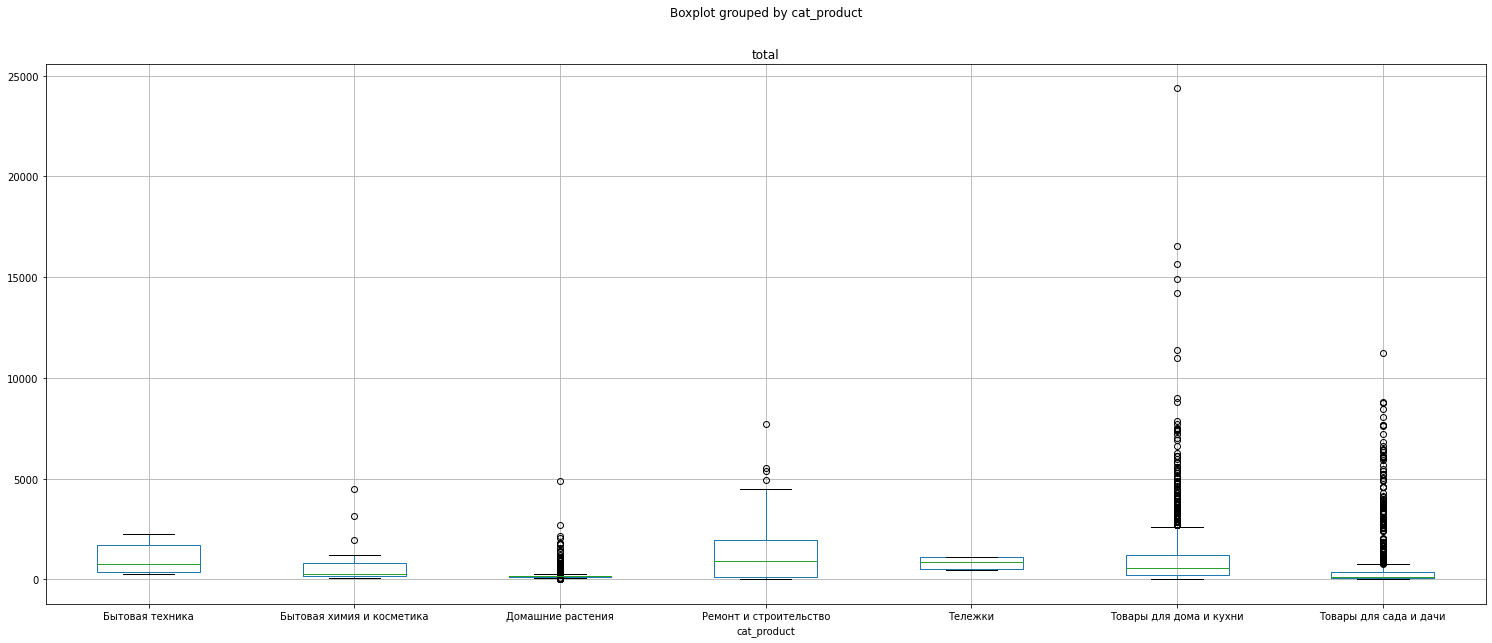

In [86]:
#посмотрим на распределение медианы выручки по товарным категориям
#look at the distribution of median revenue by product category
df_final.boxplot(column='total', by='cat_product', figsize=(25, 10))
plt.show()

In [87]:
#создадим новую переменную для уменьшения диапазона данных на основном датасете
#create a new variable to reduce the data range on the main dataset
df_final_litle = df_final[df_final['total']<=3500]

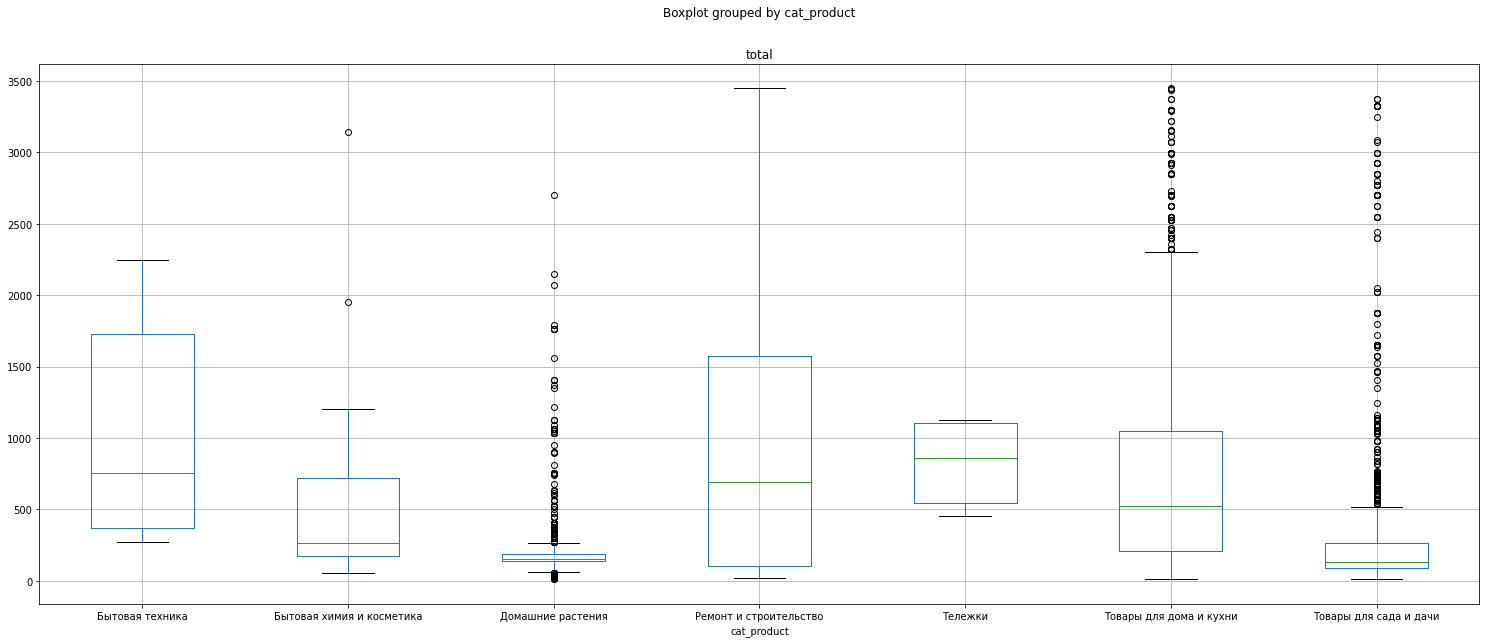

In [88]:
#в уменьшенном диапазоне
#in a reduced range
df_final_litle.boxplot(column='total', by='cat_product', figsize=(25, 10))
plt.show()

Тележки имеют самый высокий порог - выше 450 руб. по выручке и медианой выше 660. Они явно пользуются большим спросом.

Бытовая техника на 2 месте - медианное значение - выше 650 по выручке.

На 3 месте - ремонт и строительство, с низким пороговым значением (около 10 рублей) и медианное на уровне 750 по выручке.
___
Carts have the highest threshold - above 450 rubles. in terms of revenue and a median above 660. They are clearly in high demand.

Household appliances in 2nd place - the median value is above 650 in terms of revenue.

On the 3rd place - repair and construction, with a low threshold value (about 10 rubles) and a median of 750 in terms of revenue.

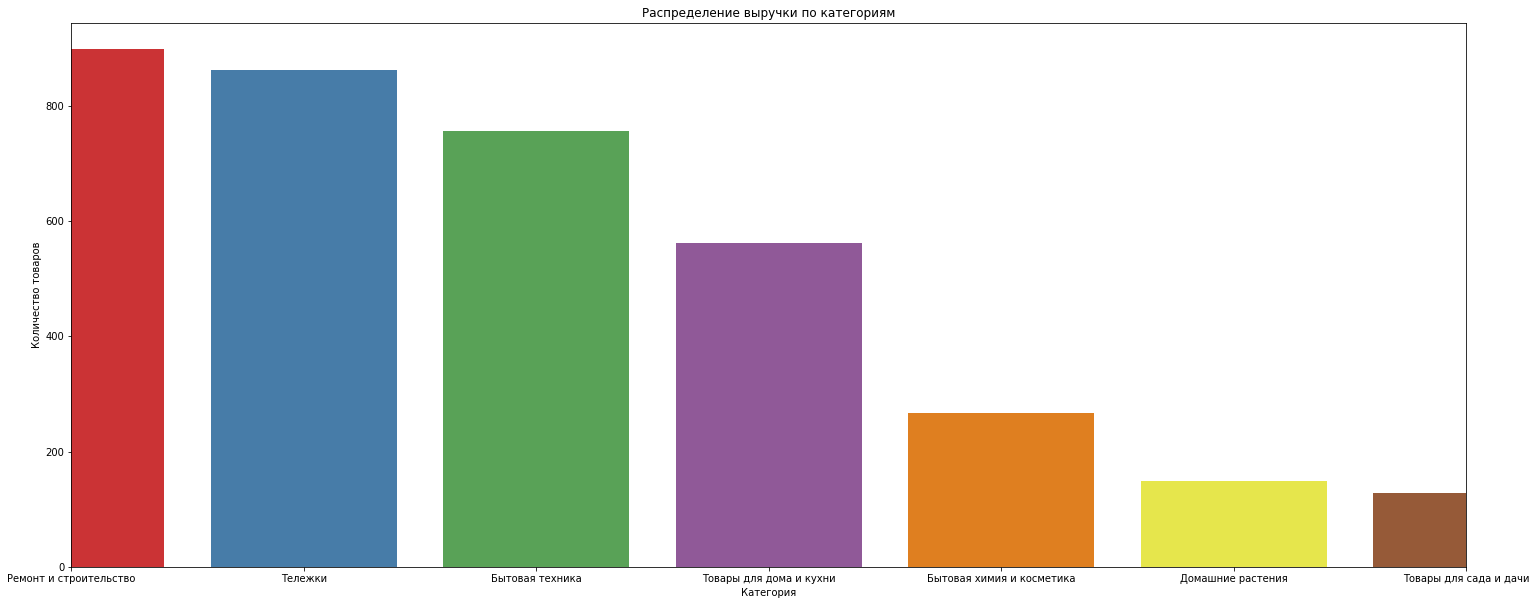

In [89]:
#производим сортировку
#sorting
median_df_total = df_final.groupby('cat_product')['total'].median().reset_index().sort_values(by='total', ascending=False).round(2)

#построим столбчатую диаграмму, с распределением количества товаров по категориям, отсортированной по медиане
#barplot
plt.figure(figsize=(25, 10))
ax = sns.barplot(data=median_df_total, x='cat_product', y='total', palette="Set1")
plt.title('Распределение выручки по категориям')
plt.xlabel('Категория')
plt.ylabel('Количество товаров')
plt.xlim([0, 6])
plt.show()

Несмотря на то, что в количественном соотношении больше всего представлено товаров в таких категориях как "Товары для дома и кухни" и "Товары для сада и дачи" - больше всего выручки приносят такие товарные категории как: "Ремонт и строительство", "Тележки" и "Бытовая техника".
___
Despite the fact that in quantitative terms, the most represented goods are in such categories as "Products for the home and kitchen" and "Products for the garden and cottages" - the most revenue comes from such product categories as: "Repair and construction", "Carts" and household appliances.

___
**Выделение топ-товаров и антитоп-товаров** / **Highlighting top products and anti-top products**

In [90]:
#выделяем топ-100 товаров по выручке
#top-100 by revenue
top_products = df_final.sort_values(by='total', ascending=False).head(15)
top_products

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total,name,cat_product
661,2018-11-06 01:02:00,1b2764ad-9151-4051-a46a-9b01b62e6335,68878,"урна уличная ""гео"", hobbyka/хоббика, 59*37,5см, сталь",5,4874.0,2018-11-01,2018-11-06,11,45,24370.0,урна,Товары для дома и кухни
1675,2019-02-04 00:06:00,909564b8-3a5c-4d3e-8310-5ba1c837bbd7,70080,мусорный контейнер hailo bigbin swing 45 0845-010 45 л хром,3,5512.0,2019-02-01,2019-02-04,2,6,16536.0,мусорный,Товары для дома и кухни
2971,2019-04-19 01:09:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71206,одеяло wellness t142 белое темостеганое 140х205 см чехол 100% полиэстер 200 г/м 4690659000306,10,1568.0,2019-04-01,2019-04-19,4,16,15680.0,одеяло,Товары для дома и кухни
5992,2019-07-29 01:07:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400 40 м 175х237х237 см зеленая,1,14917.0,2019-07-01,2019-07-29,7,31,14917.0,сушилка,Товары для дома и кухни
2970,2019-04-19 01:08:00,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,71205,"наматрацник natures бархатный бамбук бб-н-1-2 односпальный, 100% хлопок, стеганый 90х200 см, с резинкой по углам, белый",12,1183.0,2019-04-01,2019-04-19,4,16,14196.0,наматрацник,Товары для дома и кухни
4435,2019-06-04 00:07:00,940c175f-ea87-44e0-9e16-0a3d0a9abecd,71598,скатерть круглая d-175 см 50% полиэстер 50% хлопок белая wellness mld-187-эстель*01,10,1140.0,2019-06-01,2019-06-04,6,23,11400.0,скатерть,Товары для дома и кухни
1568,2019-01-22 01:05:00,6be74251-7159-4cc0-99fb-d034a17c61b0,69928,спатифиллум шопен d-12 см,45,250.0,2019-01-01,2019-01-22,1,4,11250.0,спатифиллум,Товары для сада и дачи
1728,2019-02-07 00:09:00,af4d270b-c7ae-4af5-9582-4e61ff08eff0,70135,"веник сорго с деревянной ручкой с 4-мя швами, rozenbal, r206204",20,550.0,2019-02-01,2019-02-07,2,6,11000.0,веник,Товары для дома и кухни
375,2018-10-23 01:01:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68727,"веник сорго с деревянной ручкой с 4-мя швами, rozenbal, r206204",17,530.0,2018-10-01,2018-10-23,10,43,9010.0,веник,Товары для дома и кухни
5162,2019-06-12 00:09:00,940c175f-ea87-44e0-9e16-0a3d0a9abecd,71685,скатерть 180 см wellness wtd180-лион*01 100% полиэстер,8,1104.0,2019-06-01,2019-06-12,6,24,8832.0,скатерть,Товары для дома и кухни


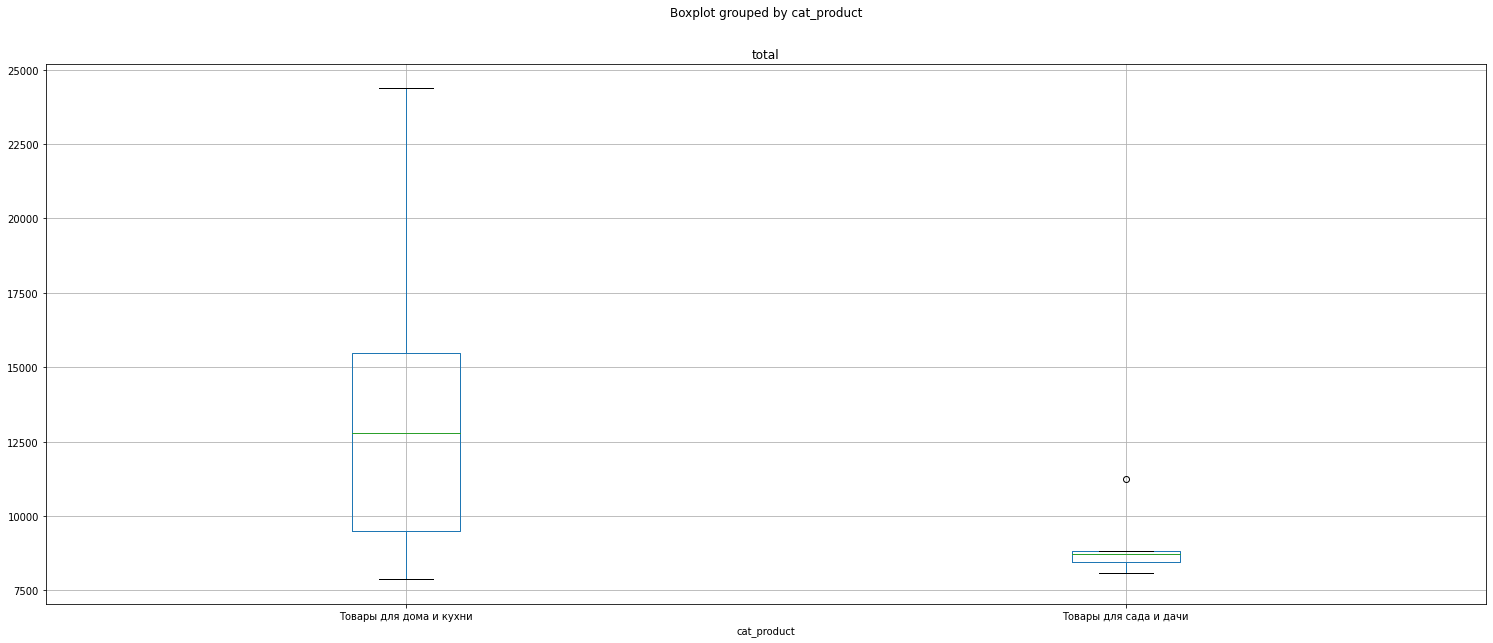

In [91]:
#распределение медианы выручки по топ - товарным категориям 
#distribution of median revenue by top product categories
top_products.boxplot(column='total', by='cat_product', figsize=(25, 10))
plt.show()

Среди топ_100-товаров наиболее востребована по выручке категория Товары для дома и кухни.
___
Among the top_100 products, the category Household and Kitchen Goods is the most in demand in terms of revenue.

In [92]:
#анти_топ-100 товаров по выручке
#anti_top 100 products by revenue
anti_top_products = df_final.sort_values(by='total', ascending=True).head(100)
anti_top_products

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total,name,cat_product
1078,2018-12-03 01:01:00,2c8b9386-2e8c-4ee9-8aa4-2b4875b68578,14514,"львиный зев волшебный ковер 0,05 г 4660010779639",1,9.0,2018-12-01,2018-12-03,12,49,9.0,львиный,Товары для дома и кухни
2159,2019-03-04 01:05:00,0f47231c-3a68-404a-88f7-08a4a172c17f,14559,"горох амброзия 10,0 г 4660010772616",1,9.0,2019-03-01,2019-03-04,3,10,9.0,горох,Товары для сада и дачи
5642,2019-07-03 02:02:00,1ec1ad59-a29b-4949-929d-f4fc4fe14758,14887,"алиссум (лобулярия) снежные одежды 0,2 г 4650091480302",1,9.0,2019-07-01,2019-07-03,7,27,9.0,алиссум,Товары для сада и дачи
979,2018-11-25 01:04:00,52aff75c-a972-4c25-bad5-dfe6a48cd981,14512,"огурец засолочный 0,3 г 4660010776102",1,10.0,2018-11-01,2018-11-25,11,47,10.0,огурец,Товары для сада и дачи
6378,2019-09-21 02:01:00,6718a7fc-75c2-4b8a-820d-b2960be23ca7,14932,петрушка итальянский гигант 2 г 4660010776553,1,10.0,2019-09-01,2019-09-21,9,38,10.0,петрушка,Товары для сада и дачи
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3037,2019-04-22 01:09:00,239a5311-25d5-4f29-a385-526a56f17995,71242,базилик пурпурные звезды d-7 см,2,14.0,2019-04-01,2019-04-22,4,17,28.0,базилик,Домашние растения
1875,2019-02-17 01:08:00,73a6767f-bbe3-4e20-8def-18e87e5c956a,70309,кофе арабика d-9 см,1,29.0,2019-02-01,2019-02-17,2,7,29.0,кофе,Товары для дома и кухни
611,2018-11-04 00:08:00,fc1d1d35-f182-4962-bb4e-7e0bdea59cd2,68844,муляж груша мини 2 шт желтая 4 см,1,29.0,2018-11-01,2018-11-04,11,44,29.0,муляж,Товары для дома и кухни
25,2018-10-02 01:01:00,1bc8ad38-3392-4042-8cde-aa5de306c947,68494,"муляж ""райские яблочки зеленые"" 2 шт полиуретан, d 3 см",1,29.0,2018-10-01,2018-10-02,10,40,29.0,муляж,Товары для дома и кухни


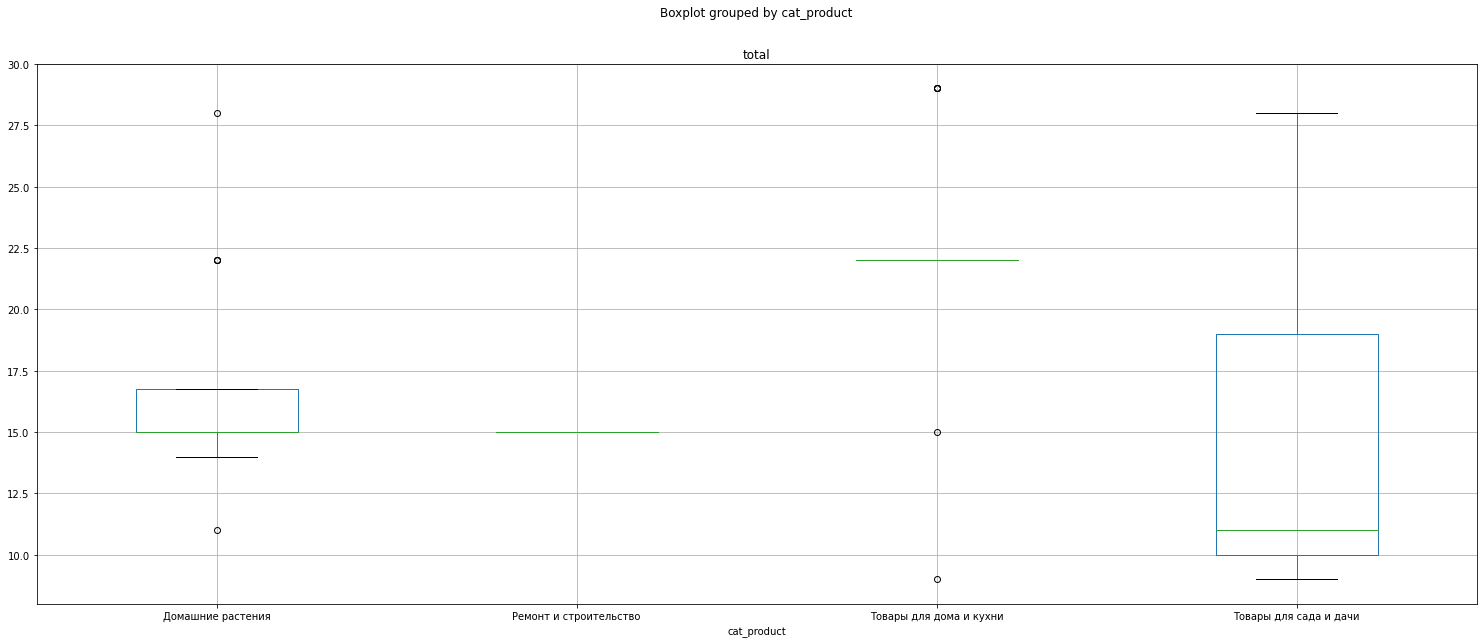

In [93]:
#распределение медианы выручки по анти-топ - товарным категориям в уменьшенном диапазоне
#distribution of median revenue by anti-top product categories in a reduced range
anti_top_products.boxplot(column='total', by='cat_product', figsize=(25, 10))
plt.show()

Среди товарных категорий по выручке у антитоп-100 товаров лидирует категория "товары для дома и сада", вероятно из-за низкой стоимости семян, которые покупают часто, особенно в сезоны.
___
Among the product categories in terms of revenue, the anti-top 100 products lead the category "home and garden goods", probably due to the low cost of seeds, which are bought frequently, especially during the seasons.

___
**Расчет количества постоянных покупателей** / **Calculation of the number of regular customers**

Количество покупок, необходимых для того, чтобы признаваться постоянным покупателем, может различаться в зависимости от политики конкретного магазина. Обычно, постоянным покупателем признаются люди, которые делают регулярные покупки в течение продолжительного времени.
В некоторых магазинах, для получения статуса постоянного покупателя, требуется накопить определенное количество покупок, например, 10.

В других - статус постоянного покупателя может быть присвоен автоматически после первой покупки.
Примем за постоянного покупателя клиента, совершившего 3 и более покупки.
___
The number of purchases required to be considered a repeat customer may vary depending on the policy of a particular store. Usually, people who make regular purchases for a long time are recognized as a repeat customer.
In some stores, in order to become a regular customer, it is required to accumulate a certain number of purchases, for example, 10.

In others, the status of a regular customer can be assigned automatically after the first purchase.
We will accept as a regular customer a client who has made 3 or more purchases.

In [94]:
#количество постоянных покупателей, совершившиз 3 и более покупки, а также выручку, которую они составили
#the number of regular customers who made 3 or more purchases, as well as the revenue they generated
frecently_customer = df_final.groupby('customer_id').agg({'order_id': 'count', 'total': 'sum'}).sort_values(by='order_id', ascending=False)
frecently_customer = frecently_customer[frecently_customer['order_id'] >= 3]
frecently_customer.sort_values(by='total', ascending=False)

,order_id,total
customer_id,,
c971fb21-d54c-4134-938f-16b62ee86d3b,142,158292.0
4d93d3f6-8b24-403b-a74b-f5173e40d7db,42,51828.0
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,3,30440.0
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,21,22056.0
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17,21361.0
...,...,...
d06bd766-4e79-4842-9bef-3f4e73dbac61,3,314.0
b15b220e-395a-4b57-980c-0f16fd2e6bbb,3,292.0
5fa9bbd0-f5b2-47e6-ad5d-a38c6e69c9b2,3,291.0


In [95]:
#найдем топ постоянных покупателей, принесших выручку более 5000 руб
#find the top regular customers who brought in more than 5,000 rubles in revenue
top_fc = frecently_customer[frecently_customer['total'] >= 5000]
top_fc.sort_values(by='total', ascending=False)

,order_id,total
customer_id,,
c971fb21-d54c-4134-938f-16b62ee86d3b,142,158292.0
4d93d3f6-8b24-403b-a74b-f5173e40d7db,42,51828.0
498f12a4-6a62-4725-8516-cf5dc9ab8a3a,3,30440.0
9f1e7d7d-ff10-4eb1-b596-1cbf8075aa3f,21,22056.0
73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17,21361.0
639c4989-b0ab-412a-b7ec-be394cb2d372,4,12095.0
a9089b7e-e6a5-48f9-9b76-48693b63a092,3,11495.0
d35ce92b-08ec-46a5-87c5-2ef42c65ed3e,6,10656.0
7d8528bb-623e-477f-a059-efc312b62d29,4,9915.0


In [96]:
#посчитаем топ постоянных покупателей, принесших выручку более 5000 руб
#let's count the top regular customers who brought in more than 5000 rub in revenue
top_fc.count()

order_id    15
total       15
dtype: int64

Так, определено 285 регуоярных покупателей (от 3-х заказов), среди которых каждый из 15-ти принесли выручку более 5000 руб. за весь период.
___
Thus, 285 regular buyers (from 3 orders) were identified, among which each of the 15 brought in revenues of more than 5,000 rubles. for the entire period.

In [97]:
#найдем самого постоянного покупателя по количеству 
#find the most regular customer by quantity
customer_top_1 = df_final[df_final['customer_id'] == 'c971fb21-d54c-4134-938f-16b62ee86d3b']
customer_top_1.sort_values(by='total', ascending=False)

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total,name,cat_product
1730,2019-02-07 01:03:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70140,контейнер для мусора доминик curver 25 л серебристый 05322-877,10,748.0,2019-02-01,2019-02-07,2,6,7480.0,контейнер,Товары для дома и кухни
1180,2018-12-12 01:01:00,c971fb21-d54c-4134-938f-16b62ee86d3b,69320,"сумка-тележка хозяйственная andersen treppensteiger scala shopper, hera, черная 119-004-80",1,5662.0,2018-12-01,2018-12-12,12,50,5662.0,сумка-тележка,Товары для сада и дачи
2068,2019-02-28 01:03:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70507,сушилка meliconi stendy junior,1,5594.0,2019-02-01,2019-02-28,2,9,5594.0,сушилка,Товары для дома и кухни
1652,2019-02-01 01:06:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70060,"сумка-тележка хозяйственная andersen scala shopper plus, lini, синяя 133-108-90",1,5249.0,2019-02-01,2019-02-01,2,5,5249.0,сумка-тележка,Товары для сада и дачи
1632,2019-01-30 01:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70020,сумка-тележка хозяйственная rolser imx001 negro convert rg черная,1,4957.0,2019-01-01,2019-01-30,1,5,4957.0,сумка-тележка,Товары для сада и дачи
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1034,2018-11-30 01:01:00,c971fb21-d54c-4134-938f-16b62ee86d3b,69159,кисточка силиконовая для выпечки персиковая 21х4 см be-1440s webber,1,59.0,2018-11-01,2018-11-30,11,48,59.0,кисточка,Товары для дома и кухни
1036,2018-11-30 01:01:00,c971fb21-d54c-4134-938f-16b62ee86d3b,69159,скребок кондитерский webber be-0368 лавандовый,1,59.0,2018-11-01,2018-11-30,11,48,59.0,скребок,Товары для дома и кухни
1033,2018-11-30 01:01:00,c971fb21-d54c-4134-938f-16b62ee86d3b,69159,кисточка силиконовая для выпечки мятная 21х4 см be-1440s webber,1,59.0,2018-11-01,2018-11-30,11,48,59.0,кисточка,Товары для дома и кухни
2046,2019-02-27 00:08:00,c971fb21-d54c-4134-938f-16b62ee86d3b,70481,спатифиллум d-7 см,2,29.0,2019-02-01,2019-02-27,2,9,58.0,спатифиллум,Домашние растения


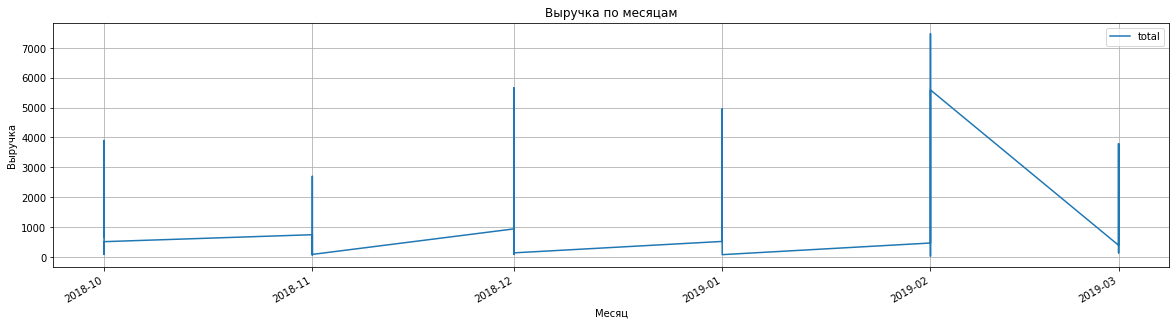

In [98]:
customer_top_1.plot(x='year_month', y='total', grid=True, figsize=(20, 5))
plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка');

In [99]:
#найдем самого постоянного покупателя 2 по количеству
#find the most regular customer 2 by quantity
customer_top_2 = df_final[df_final['customer_id'] == '4d93d3f6-8b24-403b-a74b-f5173e40d7db']
customer_top_2.sort_values(by='total', ascending=False)

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total,name,cat_product
375,2018-10-23 01:01:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68727,"веник сорго с деревянной ручкой с 4-мя швами, rozenbal, r206204",17,530.0,2018-10-01,2018-10-23,10,43,9010.0,веник,Товары для дома и кухни
268,2018-10-16 01:01:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68661,"штора для ванной комнаты diamante 240х200 см бежевая, bacchetta, 4800",4,1199.0,2018-10-01,2018-10-16,10,42,4796.0,штора,Товары для дома и кухни
269,2018-10-16 01:01:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68662,стремянки colombo leonardo 3 ступени g300a03w черая 3649,1,3974.0,2018-10-01,2018-10-16,10,42,3974.0,стремянки,Ремонт и строительство
97,2018-10-04 01:07:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68528,"мусорный контейнер в ванную комнату bowl-shiny полистирол 14х16 см белый, spirella, 1014964",2,1649.0,2018-10-01,2018-10-04,10,40,3298.0,мусорный,Товары для дома и кухни
259,2018-10-15 01:02:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68653,"сушилка для белья потолочно-настенная gimi lift 240, 5031",1,2174.0,2018-10-01,2018-10-15,10,42,2174.0,сушилка,Товары для дома и кухни
135,2018-10-08 01:02:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68567,"простыня на резинке односпальная wellness rm90-арктик 100% хлопок, 90х200 см, белая",2,899.0,2018-10-01,2018-10-08,10,41,1798.0,простыня,Товары для дома и кухни
383,2018-10-23 01:03:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68728,сушилка для белья напольная gimi modular 3 lux silver,1,1724.0,2018-10-01,2018-10-23,10,43,1724.0,сушилка,Товары для дома и кухни
133,2018-10-08 01:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68564,сушилка для белья напольная gimi modular 3 lux silver,1,1724.0,2018-10-01,2018-10-08,10,41,1724.0,сушилка,Товары для дома и кухни
70,2018-10-03 01:01:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68516,сушилка для белья потолочно-настенная gimi lift 200,1,1649.0,2018-10-01,2018-10-03,10,40,1649.0,сушилка,Товары для дома и кухни
399,2018-10-24 01:04:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68743,"гладильная доска перф металл ""эльза премиум"", 122*40, элп, ника",1,1574.0,2018-10-01,2018-10-24,10,43,1574.0,гладильная,Товары для дома и кухни


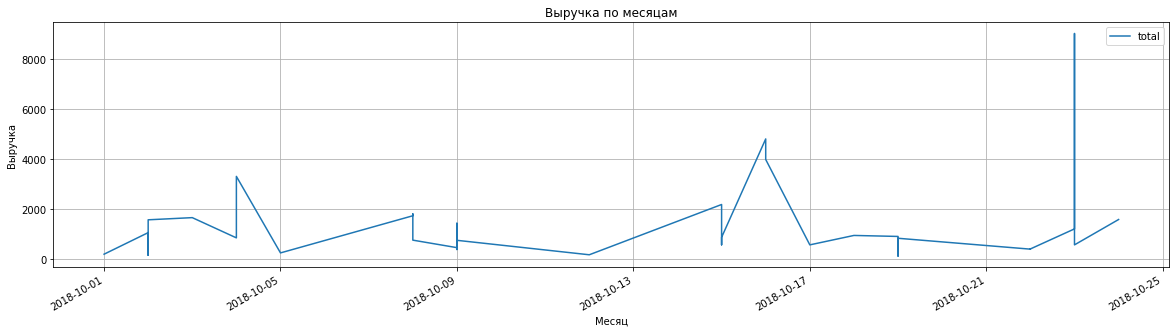

In [100]:
customer_top_2.plot(x='year_month_day', y='total', grid=True, figsize=(20, 5))
plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка');

In [101]:
#найдем самого постоянного покупателя 3 по количеству
#find the most regular customer 3 by quantity
customer_top_3 = df_final[df_final['customer_id'] == '0184f535-b60a-4914-a982-231e3f615206']
customer_top_3.sort_values(by='total', ascending=False)

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total,name,cat_product
4009,2019-05-23 01:02:00,0184f535-b60a-4914-a982-231e3f615206,14812,газания рассада однолетних цветов в кассете по 10 шт,4,352.0,2019-05-01,2019-05-23,5,21,1408.0,газания,Товары для сада и дачи
3465,2019-05-08 01:04:00,0184f535-b60a-4914-a982-231e3f615206,14737,целозия гребенчатая рассада однолетних цветов в кассете по 10 шт,4,210.0,2019-05-01,2019-05-08,5,19,840.0,целозия,Товары для сада и дачи
2901,2019-04-16 01:06:00,0184f535-b60a-4914-a982-231e3f615206,14649,петуния махровая рассада однолетних цветов в кассете по 10 шт,1,210.0,2019-04-01,2019-04-16,4,16,210.0,петуния,Товары для сада и дачи
2893,2019-04-16 01:06:00,0184f535-b60a-4914-a982-231e3f615206,14649,газания рассада однолетних цветов в кассете по 6 шт,1,210.0,2019-04-01,2019-04-16,4,16,210.0,газания,Товары для сада и дачи
2874,2019-04-16 01:03:00,0184f535-b60a-4914-a982-231e3f615206,14649,виола рассада однолетних цветов в кассете по 10 шт,1,210.0,2019-04-01,2019-04-16,4,16,210.0,виола,Товары для сада и дачи
2725,2019-04-08 00:09:00,0184f535-b60a-4914-a982-231e3f615206,14624,"рассада капусты белокачанная поздняя лидер, кассета по 10шт",1,191.0,2019-04-01,2019-04-08,4,15,191.0,рассада,Товары для сада и дачи
2726,2019-04-08 00:09:00,0184f535-b60a-4914-a982-231e3f615206,14624,"рассада перца болгарского сладкого красное чудо, горшок диам 12",4,45.0,2019-04-01,2019-04-08,4,15,180.0,рассада,Товары для сада и дачи
2729,2019-04-08 00:09:00,0184f535-b60a-4914-a982-231e3f615206,14624,"рассада томата (помидор) сорт аделина, горшок диам 12",4,45.0,2019-04-01,2019-04-08,4,15,180.0,рассада,Товары для сада и дачи
2731,2019-04-08 00:09:00,0184f535-b60a-4914-a982-231e3f615206,14624,"рассада томата (помидор) сорт хурма, горшок диам 12",4,45.0,2019-04-01,2019-04-08,4,15,180.0,рассада,Товары для сада и дачи
2727,2019-04-08 00:09:00,0184f535-b60a-4914-a982-231e3f615206,14624,рассада томата (помидор) джессика № 50 сорт индетерминантный раннеспелый красный,4,38.0,2019-04-01,2019-04-08,4,15,152.0,рассада,Товары для сада и дачи


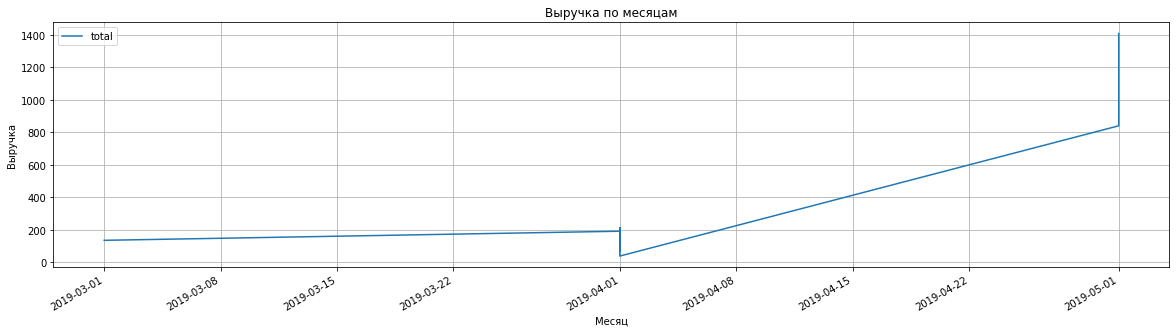

In [102]:
customer_top_3.plot(x='year_month', y='total', grid=True, figsize=(20, 5))
plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка');

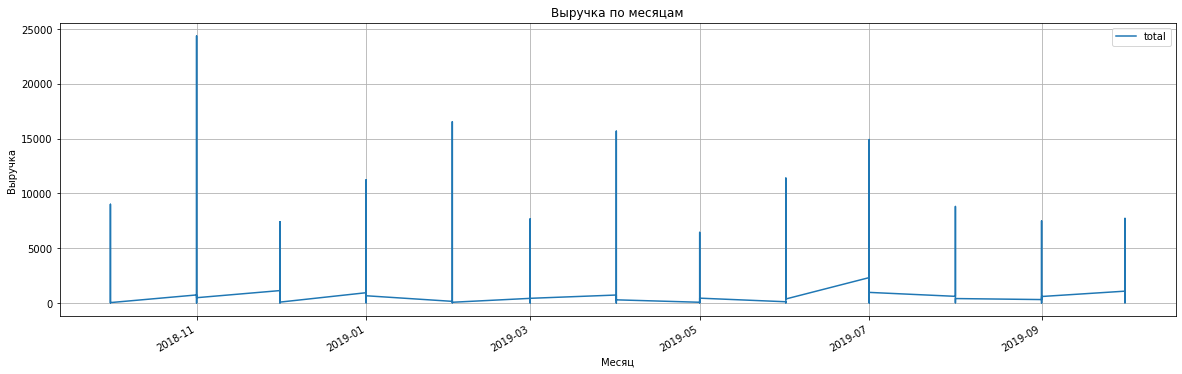

In [103]:
df_final.plot(x='year_month', y='total', grid=True, figsize=(20, 6))
plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка');

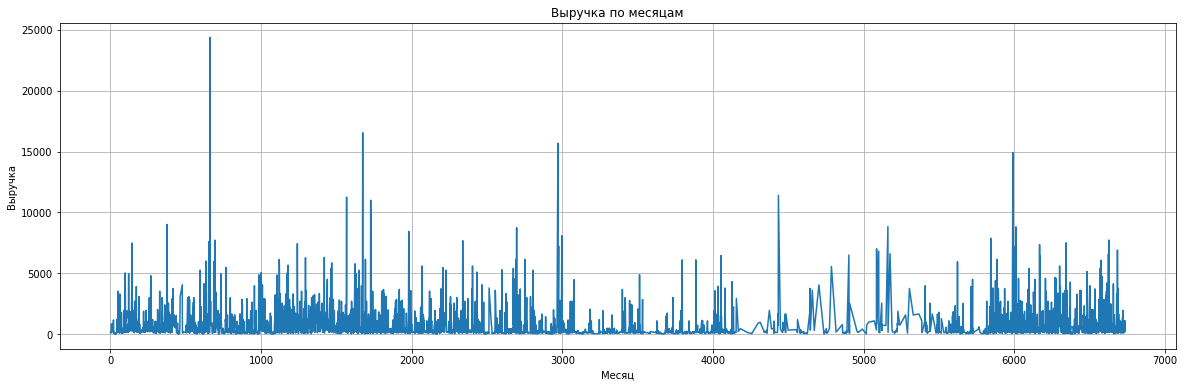

In [104]:
df_final['total'].plot(x='year_month', y='total', grid=True, figsize=(20, 6))
plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Выручка');

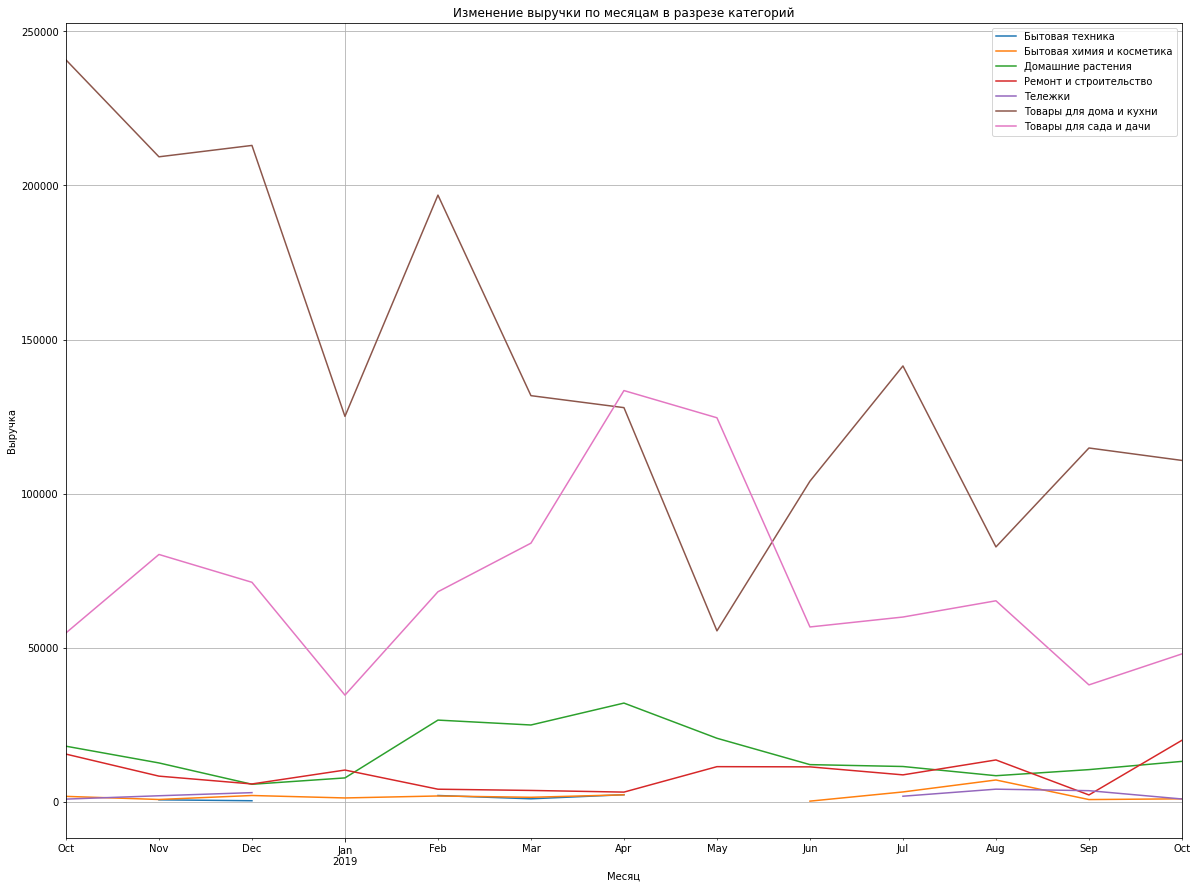

In [105]:
df_final.pivot_table(
    index='year_month', 
    columns='cat_product',  
    values='total',  
    aggfunc='sum',  
).plot(figsize=(20, 15), grid=True)

plt.title('Изменение выручки по месяцам в разрезе категорий')
plt.xlabel('Месяц')
plt.ylabel('Выручка')
plt.legend(loc='best')
plt.show()

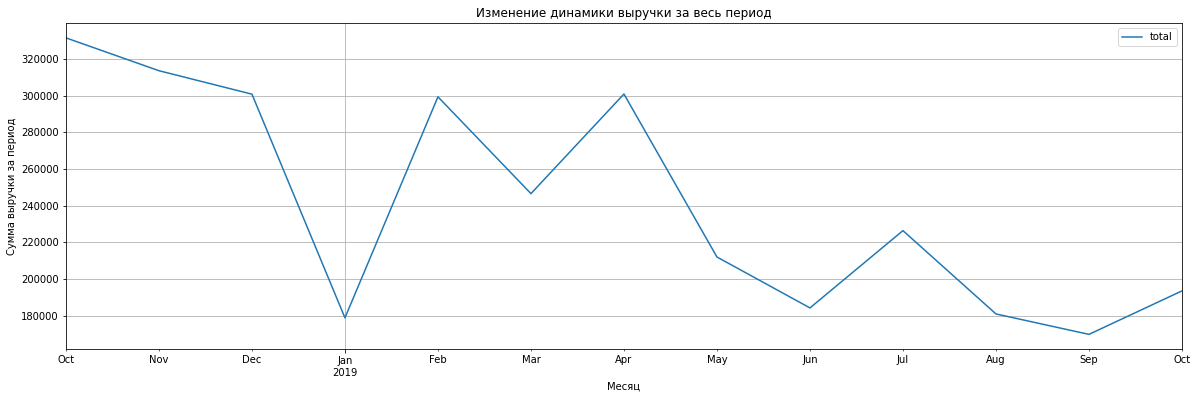

In [106]:
df_final.groupby(['year_month']).agg({'total': 'sum'}).plot( y='total', grid=True, figsize=(20, 6))
plt.title('Изменение динамики выручки за весь период')
plt.xlabel('Месяц')
plt.ylabel('Сумма выручки за период');

Динамика выручки за весь период - неравномерная, скачкообразная, что говорит о сезонном характере продаж.
___
The dynamics of revenue for the entire period is uneven, spasmodic, which indicates the seasonal nature of sales.

**Вывод**

Уникальных покупателей: 2371

Минимальная дата заказа: 2018-10-01
Максимальная дата заказа: 2019-10-31

Наблюдаются нарастающие тренды по увеличению количества покупок к январю, к марту и ноябрю. Конкретные даты в таком виде интерпретировать сложно.

Пиковое значение явно просматривается на 41 неделе.

41 неделя пришлась на август 2019 года. Пиковое значение в октябре могло быть задвоено за счет октября 2018 года и октября 2019 года, так как на графике по дням не наблюдается каких-либо пиковых значений в октябре.

Минимальное количество заказов: 158
Максимальное количество заказов: 425
Среднее количество заказов в месяц: 233

Пиковые значения выручки наблюдаются в ноябре, феврале, апреле и октябре. Похоже, что это сезонность.

Максимальный средний чек за весь период в апреле 2019 года, что говорит о том, что было приобретено что-то дорогостоящее, так как нет максимального значения по количеству покупок в этом месяце по сравнению с доугими. Но тем не менее, это сезонный месяц и в нем наблюдаюься пиковые значения по выручке. 

Средний чек в месяц с учетом максимума -  1781,78.

Были сформированы и распределены следующие категориии:

* Товары для дома и кухни 
* Товары для сада и дачи 
* Домашние растения 
* Ремонт и строительство 
* Бытовая химия и косметика 
* Бытовая техника  
* Тележки

Тележки имеют самый высокий порог - выше 450 руб. по выручке и медианой выше 660. Они явно пользуются большим спросом.

Бытовая техника на 2 месте - медианное значение - выше 650 по выручке.

На 3 месте - ремонт и строительство, с низким пороговым значением (около 10 рублей) и медианное на уровне 750 по выручке.

Среди топ-товаров наиболее востребована по выручке категория Товары для дома и кухни.

Среди товарных категорий по выручке у антитоп-100 товаров лидирует категория "товары для дома и сада", вероятно из-за низкой стоимости семян, которые покупают часто, особенно в сезоны.

За постоянного покупателя принят клиент, совершивший 3 и более покупки.

Так, определено 285 регулярных покупателей (от 3-х заказов), среди которых каждый из 15-ти принесли выручку более 5000 руб. за весь период.

Несмотря на то, что в количественном соотношении больше всего представлено товаров в таких категориях как "Товары для дома и кухни" и "Товары для сада и дачи" - больше всего выручки приносят такие товарные категории как: "Ремонт и строительство", "Тележки" и "Бытовая техника". По факту получается, что магазин зарабатывает больше на том, что продает в меньшьем обьме. "Спрос рождает предложение". Может имеет место быть решить вопрос с расширением склада? Ведь понятно, что для хранения упаковки семян достаточно меньше площади, чем для габаритных товаров.

Динамика выручки за весь период - неравномерная, скачкообразная, что говорит о сезонном характере продаж.
___
**Conclusion**

Unique Buyers: 2371

Minimum order date: 2018-10-01
Maximum order date: 2019-10-31

There are growing trends to increase the number of purchases by January, March and November. Specific dates in this form are difficult to interpret.

The peak value is clearly visible at 41 weeks.

Week 41 fell on August 2019. The October peak may have been doubled by October 2018 and October 2019 as the daily chart does not show any October peaks.

Minimum number of orders: 158
Maximum number of orders: 425
Average number of orders per month: 233

Peak revenues are observed in November, February, April and October. It seems to be seasonal.

The maximum average check for the entire period in April 2019, which indicates that something expensive was purchased, since there is no maximum value for the number of purchases this month compared to the other ones. But nevertheless, this is a seasonal month and peaks in revenue are observed in it.

The average check per month, taking into account the maximum, is 1781,78.

The following categories were formed and distributed:

* Home and Kitchen Products
* Goods for the garden and cottages
* House plants
* Repair and construction
* Household chemicals and cosmetics
* Appliances
* Carts

Carts have the highest threshold - above 450 rubles. in terms of revenue and a median above 660. They are clearly in high demand.

Household appliances in 2nd place - the median value is above 650 in terms of revenue.

On the 3rd place - repair and construction, with a low threshold value (about 10 rubles) and a median of 750 in terms of revenue.

Among the top products, the category Homewares and kitchenware is the most in demand in terms of revenue.

Among the product categories in terms of revenue, the anti-top 100 products lead the category "home and garden goods", probably due to the low cost of seeds, which are bought frequently, especially during the seasons.

A regular customer is a customer who has made 3 or more purchases.

So, 285 regular buyers were identified (from 3 orders), among which each of the 15 brought in revenues of more than 5,000 rubles. for the entire period.

Despite the fact that in quantitative terms, the most represented goods are in such categories as "Products for the home and kitchen" and "Products for the garden and cottages" - the most revenue comes from such product categories as: "Repair and construction", "Carts" and household appliances. In fact, it turns out that the store earns more on what it sells in a smaller volume. "Demand creates supply". Maybe there is a place to solve the problem with the expansion of the warehouse? After all, it is clear that less space is enough to store a package of seeds than for dimensional goods.

The dynamics of revenue for the entire period is uneven, spasmodic, which indicates the seasonal nature of sales.

# **Шаг 4 "Сегментация покупателей"** <a id='intro_4'></a>

* обоснование сегментации покупателей
* сегментирование покупателей на основе алгоритма 1 - агломеративной иерархической кластеризации, позволяюшей учесть все признаци (например, количество товаров в заказе, частоту покупок, средний чек и другие)
* сегментирование покупателей на основе алгоритма 2 - K-Means (sklearn.cluster), учитывающий ближайшие расстояния между схожими признаками(после оценки оптимального числа кластеров)
* на основе метрики силуэта (silhouette score) рассмотрим насколько сильно отличаются внутрикластерные и межкластерные расстояния чтобы понять, какой алгоритм сгруппировал лучше
___
Step 4 "Customer Segmentation"

* rationale for customer segmentation
* segmentation of buyers based on algorithm 1 - agglomerative hierarchical clustering, which allows to take into account all the features (for example, the number of goods in an order, the frequency of purchases, the average check, and others)
* customer segmentation based on algorithm 2 - K-Means (sklearn.cluster), taking into account the nearest distances between similar features (after estimating the optimal number of clusters)
* based on the silhouette metric (silhouette score), let's consider how much the intra-cluster and inter-cluster distances differ in order to understand which algorithm grouped better

___
**Обоснование сегментации покупателей** / **Rationale for customer segmentation**

Необходимость сегментировать покупателей обусловлена главной задачей проекта. А именно, нужно сегментировать **по профилю потребления**.
На данном этапе произойдет разделение покупателей на группы с общими характеристиками, например такими как предпочтения. 

Это может помочь заказчику лучше понять потребности своих клиентов, разрабатывать маркетинговые стратегии, которые будут наиболее эффективными для каждой группы, что позволит оптимально распределить ресурсы, а также пересмотреть товарный ассортимент.
___
The need to segment customers is due to the main objective of the project. Namely, you need to segment **by consumption profile**.
At this stage, there will be a division of buyers into groups with common characteristics, such as preferences.

This can help the customer to better understand the needs of their customers, develop marketing strategies that will be most effective for each group, which will allow optimal allocation of resources, as well as review the product range.

___
**Сегментирование покупателей на основе алгоритма 1 - агломеративной иерархической кластеризации, позволяюшей учесть все признаци (например, количество товаров в заказе, частоту покупок, средний чек и другие)**
___
**Segmentation of customers based on Algorithm 1 - agglomerative hierarchical clustering, which allows to take into account all features (for example, the number of items in an order, the frequency of purchases, the average bill, and others)**

Для корректной сегментации не будем учитивыть оптовых покупателей поскольку кластеризация очень чувствительна к выбросам.
___
For correct segmentation, we will not take into account wholesale buyers, since clustering is very sensitive to outliers.

In [107]:
#найдем покупателей, которые сделали более 15 заказов и на сумму болee 20 000 рублей
#we will find buyers who have made more than 15 orders and in the amount of more than 20,000 rubles
orders_customers = (df_final.groupby('customer_id', as_index=False,)
    .agg({'order_id': 'nunique',
         'total' : 'sum'})
)

orders_customers.columns = ['customer_id', 'orders', 'sum_total']
orders_customers.sort_values(by='orders', ascending=False).head(10)

,customer_id,orders,sum_total
1851,c971fb21-d54c-4134-938f-16b62ee86d3b,125,158292.0
719,4d93d3f6-8b24-403b-a74b-f5173e40d7db,33,51828.0
1062,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,17,21361.0
1688,b7b865ab-0735-407f-8d0c-31f74d2806cc,7,3779.0
16,0184f535-b60a-4914-a982-231e3f615206,5,5891.0
1757,bea7a833-2074-42db-bc49-4457abd3c930,4,4409.0
2072,e0535076-6270-4df2-8621-cb06264a94fa,4,636.0
848,5d566073-92e8-41d1-a2e6-d301ee5ab6d8,3,434.0
969,6a86cc77-ef15-496f-b5d3-89005597ee5d,3,3151.0
974,6b0c6cfb-7717-4c34-8535-bbc6e2b2c758,3,660.0


Покупателей, которые сделали более 15 заказов и на сумму более 20 000 рублей - всего 3. Похоже, что это мелкий опт - не будем их учитывать.

In [108]:
array_customers = orders_customers.sort_values(by='orders', ascending=False).head(3)
array_customers = array_customers['customer_id'].to_numpy()

# проверим тип данных new_array  
# check the data type of new_array
array_customers

array(['c971fb21-d54c-4134-938f-16b62ee86d3b',
       '4d93d3f6-8b24-403b-a74b-f5173e40d7db',
       '73d1cd35-5e5f-4629-8cf2-3fda829d4e58'], dtype=object)

In [109]:
#удалим мелкооптовых из списка 'array_by_customers' в нашем 'df'
#delete small wholesalers from 'array_by_customers' list in our 'df'
df_net = df.query('customer_id not in @array_customers')
df_net.shape

(4647, 11)

In [110]:
#добавим категарии
#add categories
df_net['cat_product'] = df_net['product'].apply(categories)
df_net.cat_product.value_counts()

Товары для дома и кухни      1815
Товары для сада и дачи       1738
Домашние растения             955
Ремонт и строительство         79
Бытовая химия и косметика      36
Тележки                        18
Бытовая техника                 6
Name: cat_product, dtype: int64

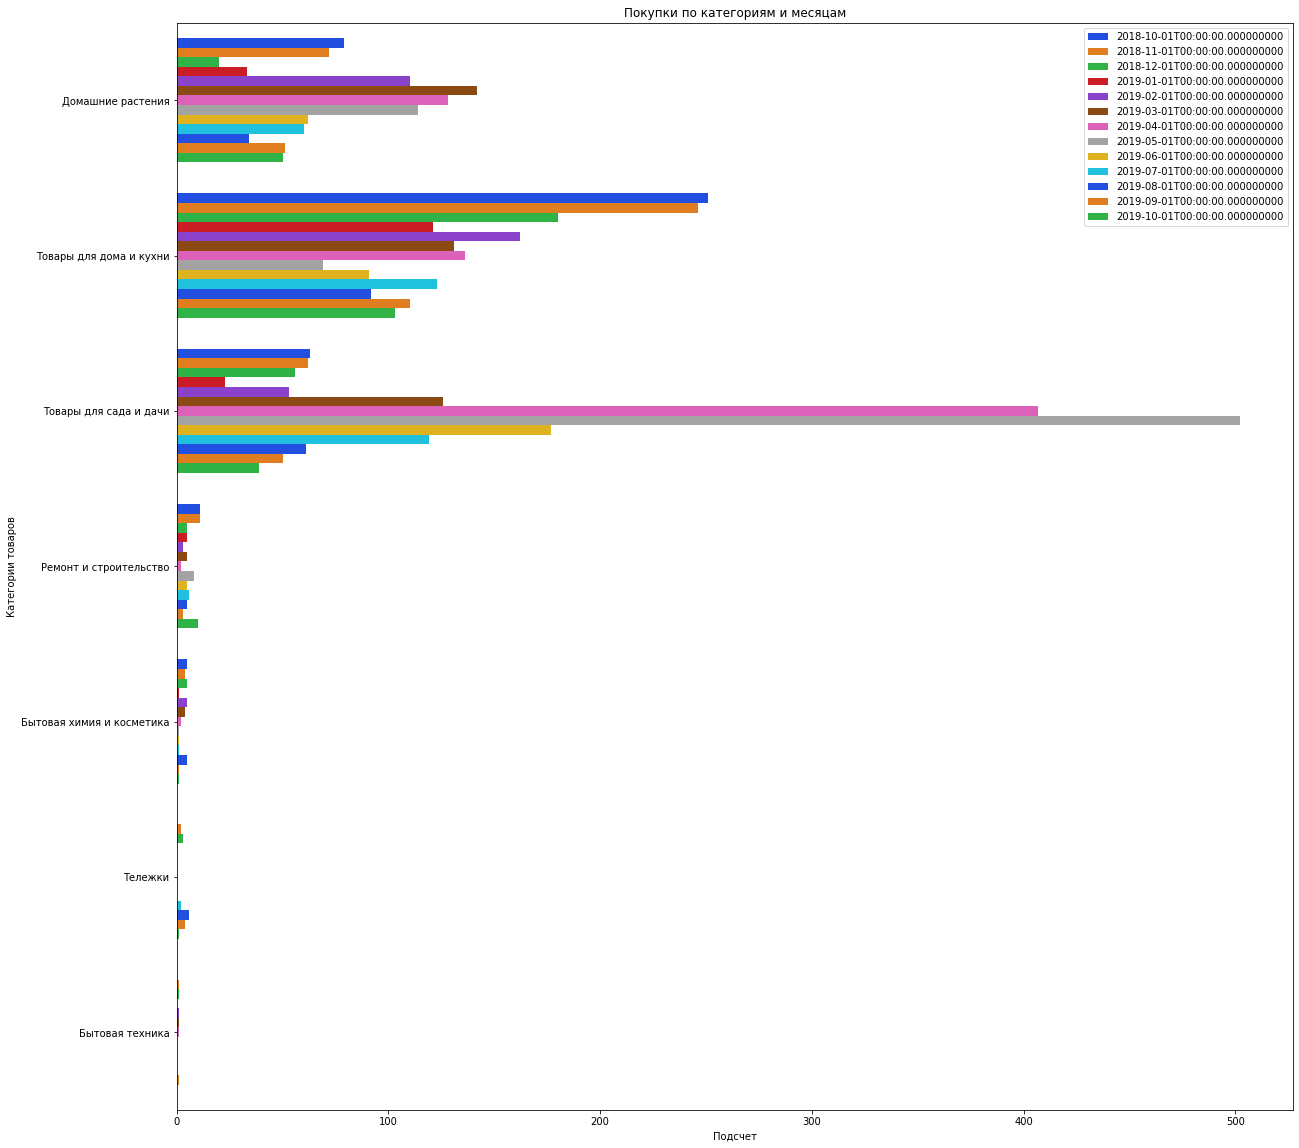

In [111]:
#визуализируем
#visulization
plt.figure(figsize=(20, 20))
sns.countplot(data=df_net, y='cat_product', hue="year_month",  palette='bright')
plt.legend(loc='best')
plt.title('Покупки по категориям и месяцам')
plt.xlabel('Подсчет')
plt.ylabel('Категории товаров');
plt.show()

В апреле-мае было совершено больше всего покупок в категории "Товары для сада и дачи"
____
In April-May, the most purchases were made in the category "Products for the garden and cottages"

In [112]:
#группируем данные по категориям и агрегируем сумму выручки
#group data by categories
revenue_by_category = df_net.groupby('cat_product')['total'].sum().rename('выручка_total')

#создаем новый датафрейм, добавляя столбец с выручкой по категориям
#create new df
df_with_revenue = df_net.join(revenue_by_category, on='cat_product', rsuffix='total')

#выводим результат
#output
df_with_revenue.head(3)

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total,cat_product,выручка_total
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018-10-01,10,40,142.0,Домашние растения,198565.0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-01,2018-10-01,10,40,194.0,Товары для дома и кухни,1955599.0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10-01,10,40,112.0,Домашние растения,198565.0


In [114]:
#сгруппируем DataFrame df_with_revenue по customer_id 
#и произведем агрегацию по необходимым столбцам, чтобы получить суммарное значение price и total

#group DataFrame df_with_revenue by customer_id
df_finish = (
    df_with_revenue.groupby('customer_id', as_index=False)
    .agg({'order_id':'nunique',
         'quantity':'mean',
         'price':'sum',
         'total':'sum'})
)

#добавим новый столбец mean_price, который равен отношению суммы price к сумме quantity
#add new column mean_price
df_finish['mean_price'] = (df_finish['price'] / df_finish['quantity']).round(2)

#переставим колонки так, чтобы столбец mean_price был после столбца quantity
#rearrange the columns so that the mean_price column is after the quantity column
df_finish = df_finish[['customer_id', 'order_id', 'quantity', 'mean_price', 'total']]

#переименовываем колонки
#rename
df_finish.columns = ['customer_id', 'orders', 'quantity_mean', 'price_mean', 'total_mean']

#сортируум
#sorting
df_finish.sort_values(by='orders', ascending=False).head(10)

,customer_id,orders,quantity_mean,price_mean,total_mean
1745,b7b865ab-0735-407f-8d0c-31f74d2806cc,7,3.777778,397.32,3779.0
17,0184f535-b60a-4914-a982-231e3f615206,5,1.933333,1712.07,5891.0
698,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,4,21.250000,147.29,41900.0
1817,bea7a833-2074-42db-bc49-4457abd3c930,4,2.142857,856.33,4409.0
2143,e0535076-6270-4df2-8621-cb06264a94fa,4,1.000000,636.00,636.0
876,5d566073-92e8-41d1-a2e6-d301ee5ab6d8,3,5.666667,27.18,434.0
802,552e17df-ba16-4e66-84fb-55a5557a6bea,3,3.444444,455.81,5398.0
1993,d16fbc13-50a6-4dea-aafc-bc197aafc9e4,3,1.000000,1298.00,1298.0
1976,d02429ab-22e0-4ff2-9465-3082befde444,3,1.000000,3261.00,3261.0
1186,7d64b4ea-d03f-4c3a-b283-21b3d0d237f1,3,2.333333,172.29,938.0


In [115]:
#стандартизируем данные
#standardize data

sc = StandardScaler()
x_sc = sc.fit_transform(df_finish.drop(columns=['customer_id']))

#строим матрицу расстояний
#build the distance matrix
matrix = linkage(x_sc, method = 'ward')

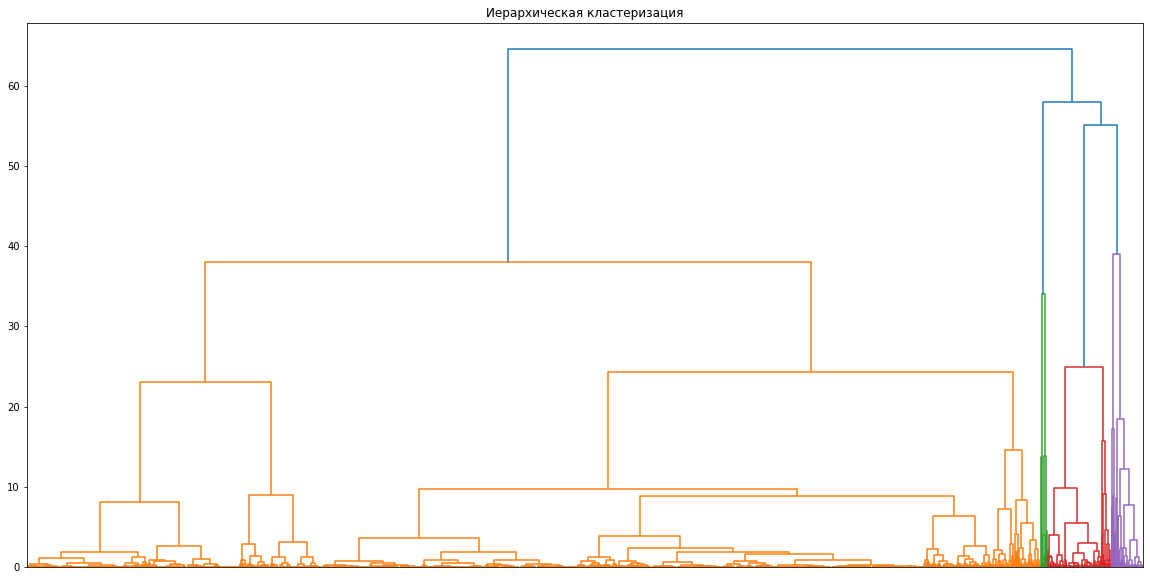

In [116]:
#дендрограмма
#dendrogram
plt.figure(figsize=(20, 10))  
dendrogram(matrix, orientation='top', no_labels=True)
plt.title('Иерархическая кластеризация')
plt.show()

Оптимально определено 4 кластера, попробуем применить 4 кластера на алгоритм K-Means
___
4 clusters are optimally defined, let's try to apply 4 clusters to the K-Means algorithm

___
**Cегментирование покупателей на основе алгоритма 2 - K-Means (sklearn.cluster), учитывающий ближайшие расстояния между схожими признаками(после оценки оптимального числа кластеров)**
___
**Segmentation of buyers based on Algorithm 2 - K-Means (sklearn.cluster), taking into account the nearest distances between similar features (after estimating the optimal number of clusters)**

In [117]:
#задаём модель k_means с числом кластеров 4 и фиксируем значение random_state
#set the k_means model with 4 clusters and fix the random_state value
k_means = KMeans(n_clusters=4, random_state=0)

#прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 4)
#predict clusters for observations (the algorithm assigns them numbers from 0 to 4)
labels = k_means.fit_predict(x_sc)

In [118]:
#сохраняем метки кластера в поле финального датасета
#save the cluster labels in the field of the final dataset
df_finish['cluster'] = labels

In [119]:
#проверяем метки
#checking labels
df_finish.head()

,customer_id,orders,quantity_mean,price_mean,total_mean,cluster
0,000d6849-084e-4d9f-ac03-37174eaf60c4,1,1.0,555.0,555.0,0
1,001cee7f-0b29-4716-b202-0042213ab038,1,1.0,442.0,442.0,0
2,00299f34-5385-4d13-9aea-c80b81658e1b,1,2.0,228.5,914.0,0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1,1.0,1649.0,1649.0,0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1,2.0,581.0,2324.0,0


In [121]:
#смотрим рапределение количества пользователей по кластерам
#we look at the distribution of the number of users by clusters
df_finish.groupby('cluster', as_index=False).agg({'customer_id':'nunique'})

,cluster,customer_id
0,0,2087
1,1,145
2,2,204
3,3,11


In [122]:
#смотрим статистику по средним значениям признаков по кластеру
#we look at the statiistics of the average values by cluster
df_finish.groupby('cluster').mean().round(2).T

cluster,0,1,2,3
orders,1.00,2.21,1.06,1.36
quantity_mean,3.02,2.65,1.06,141.28
price_mean,556.41,955.34,4181.88,42.54
total_mean,865.01,1577.52,4541.69,23685.64


Распределение по кластерам:

**0** = сделали один заказ, содержащий в среднем 3.02 позиций, средняя цена - 556.41 руб. и средняя общая цена до 865.01 - _это кластер покупателей приобретающих что-то разово, но в нескольних количествах_.

**1** = сделали 2 или более заказов,содержащих в среднем 2.65 позиций, средняя цена - 955.34 руб. и 1577.52 общая стоимость покупки - _это кластер покупателей приобретающих что-то повторно и в нескольних количествах_.

**2** = сделали 1 или более заказов, содержащий 1.06 позиции, средняя цена - 4181.88 рубля, общей стоимостью покупки 4541.69 рубля - _это кластер покупателей приобретающих что-то дорогое и в единичном обьеме_.

**3** = сделали 1 или более заказов, содержащий 141.28 позиции, средняя цена - 42.54 рубля, общей стоимостью покупки 23685.64 рубля - _это кластер покупателей приобретающих что-то дешевое и в больших количествах_.
___
Cluster distribution:

**0** = made one order containing an average of 3.02 items, the average price is 556.41 rubles. and the average total price up to 865.01 - _this is a cluster of buyers who purchase something one-time, but in several quantities_.

**1** = made 2 or more orders containing an average of 2.65 items, the average price is 955.34 rubles. and 1577.52 total purchase value - _is a cluster of buyers who buy something repeatedly and in several quantities_.

**2** = made 1 or more orders containing 1.06 items, the average price is 4181.88 rubles, the total purchase price is 4541.69 rubles - _this is a cluster of buyers who purchase something expensive and in a single volume_.

**3** = made 1 or more orders containing 141.28 items, average price - 42.54 rubles, total purchase value of 23685.64 rubles - _this is a cluster of buyers who buy something cheap and in large quantities_.

___
**На основе метрики силуэта (silhouette score) рассмотрим насколько сильно отличаются внутрикластерные и межкластерные расстояния чтобы понять, какой алгоритм сгруппировал лучше**
___
** Based on the silhouette metric (silhouette score), let's consider how much the intra-cluster and inter-cluster distances differ in order to understand which algorithm grouped better **

In [123]:
#посчитаем метрику силуэта для нашей кластеризации
#calculate the silhouette metric for our clustering
print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels) ))

Silhouette_score: 0.70


Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация и насколько хорошо каждый объект находится в своем кластере в сравнении с другими кластерами. 
В нашем случае метрика составила 0.7, что конечно не самый худший вариант, но и не самый лучший. Кластеризация не самая качественная, что мы и увидели на распределении по кластерам.
___
The value of the silhouette metric takes values ​​from -1 to 1. The closer to 1, the better the clustering and how well each object is in its cluster compared to other clusters.
In our case, the metric was 0.7, which is certainly not the worst option, but not the best either. Clustering is not of the highest quality, which we saw in the distribution by clusters.

In [124]:
#метод merge() для объединения таблиц
#merge() method for merging tables
df_merge = df_net.merge(df_finish, on='customer_id', how='left')
df_merge.head()

,date,customer_id,order_id,product,quantity,price,year_month,year_month_day,month,week,total,cat_product,orders,quantity_mean,price_mean,total_mean,cluster
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,2018-10-01,10,40,142.0,Домашние растения,1,1.0,1037.0,1037.0,0
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12, h25",1,194.0,2018-10-01,2018-10-01,10,40,194.0,Товары для дома и кухни,1,1.0,1037.0,1037.0,0
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10-01,10,40,112.0,Домашние растения,1,1.0,1037.0,1037.0,0
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,2018-10-01,10,40,179.0,Домашние растения,1,1.0,1037.0,1037.0,0
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,2018-10-01,10,40,112.0,Домашние растения,1,1.0,1037.0,1037.0,0


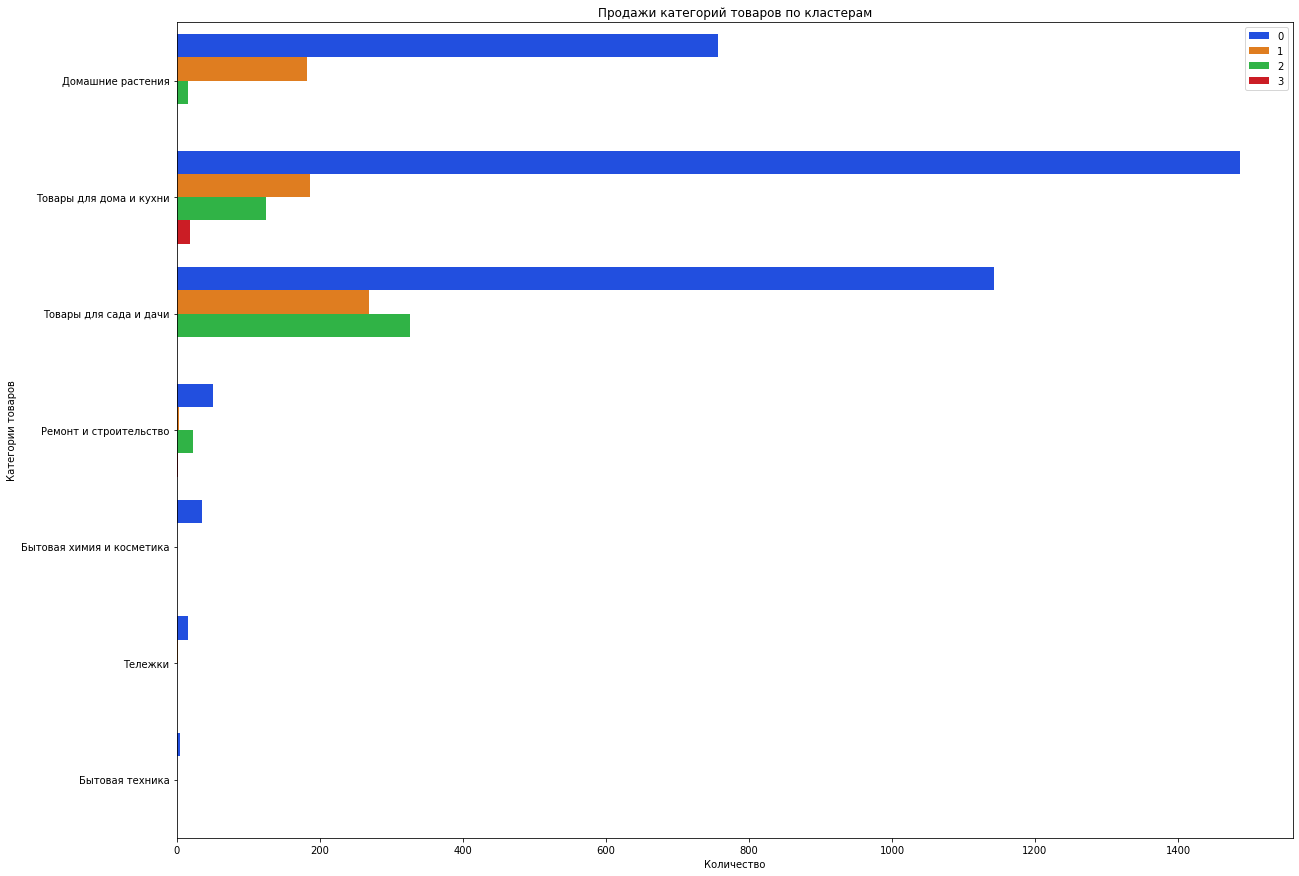

In [125]:
#визуализируем распределение продаж кластеров по категориям
#visualize the distribution of cluster sales by category
plt.figure(figsize=(20, 15))
sns.countplot(data=df_merge, y='cat_product', hue="cluster", palette='bright')
plt.title('Продажи категорий товаров по кластерам')
plt.xlabel('Количество')
plt.ylabel('Категории товаров')
plt.legend(loc='best')
plt.show()

| место| кластеры| категория|
|-----|--------|--------|
| 1   | 0 , 3  | "товары для дома и кухни"|
| 1   | 1 , 2  | "товары для сада и дачи"|
| 2   | 0      | "товары для сада и дачи"|
| 2   | 1 , 2  | "товары для дома и кухни"|
| 3   | 0      | "ремонт и строительство"|
| 3   | 1 , 2  | "домашние растения"|


| place| clusters| category|
|-----|--------|--------|
| 1 | 0 , 3 | "goods for home and kitchen" |
| 1 | 1 , 2 | "goods for the garden and cottages" |
| 2 | 0 | "goods for the garden and cottages" |
| 2 | 1 , 2 | "goods for home and kitchen" |
| 3 | 0 | "repair and construction"|
| 3 | 1 , 2 | "house plants"|

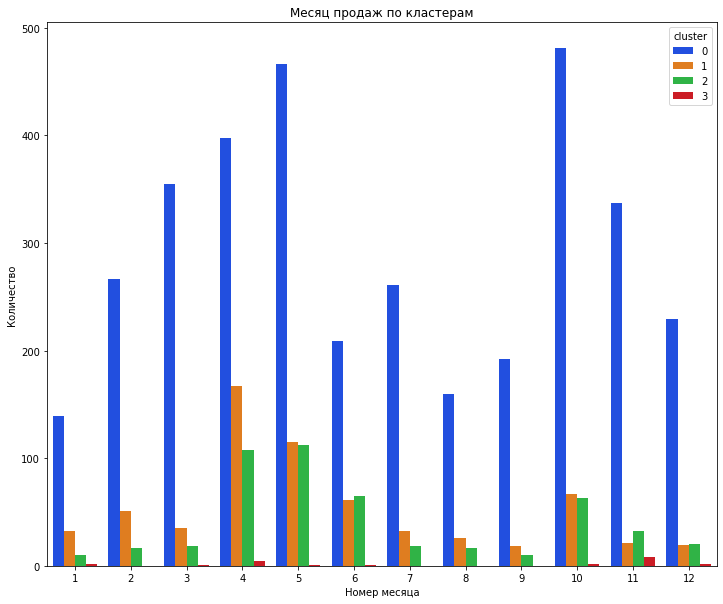

In [126]:
#визуализируем распределение продаж кластеров по месяцам
#visualize the distribution of cluster sales by months
plt.figure(figsize=(12, 10))
sns.countplot(data=df_merge, x='month', hue="cluster", palette='bright')
plt.title('Месяц продаж по кластерам')
plt.xlabel('Номер месяца')
plt.ylabel('Количество')
plt.show()

| |место / месяц| январь|февраль| март| апрель| май| июнь | июль| август | сентябрь | октябрь | ноябрь | декабрь|
|------|---------------| -----| -----| ----| ----| ---| --- | ----| ---- | ------ | ------ | ----- | ------|
|кластеры|      **1**    |------|------|-----|   1  | 2  |-----|-----|------|---------|  0    |   3    |------|
|кластеры|      **2**    |------|------|-----|  2, 3| 0, 1|----|-----|------|---------|--------|-------|------|
|кластеры|      **3**    |------|------|-----|   0  |----|  2  |-----|------|---------|    3   |-------|------|

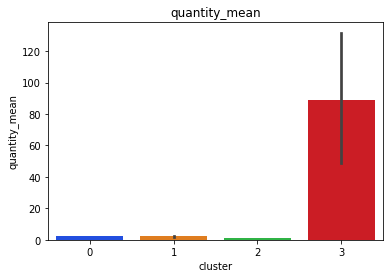

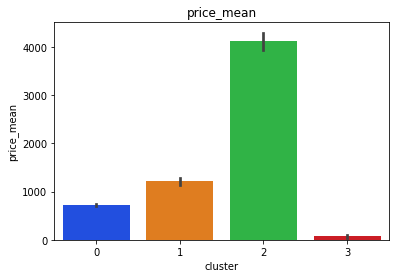

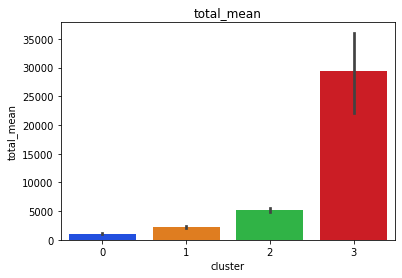

In [127]:
#посмотрим распределение метрик по кластерам
#let's see the distribution of metrics by clusters
num_columns = ['quantity_mean', 'price_mean', 'total_mean']

for column in num_columns:
    plt.figure(figsize=(6, 4))
    sns.barplot(data=df_merge, y=df_merge[column], 
                x=df_merge['cluster'],palette='bright')
    plt.title(column)
    plt.show()

Так, 3 кластера (0,1,2) имеют практически одинаковое распределение по среднему количеству кроме 3-го кластера.
2-ый кластер имеет наивысшую среднюю цену, 3-ый кластер - общую выручку.
___
So, 3 clusters (0,1,2) have almost the same distribution in terms of the average number, except for the 3rd cluster.
The 2nd cluster has the highest average price, the 3rd cluster has the total revenue.

**Вывод**

Для корректной сегментации не были учитены оптовые покупатели поскольку кластеризация очень чувствительна к выбросам. Более того, Поведение оптовиков отличается от других покупателей, что и наблюдается на протяжении всего анализа. Оптовики покупают много, но реже. Основные их товарные категории - "хозтовары", "другое", "тележки". Их смело можно выделить в отдельную категорию.

Оптимально определено 4 кластера.

Распределение по кластерам:

**0** = сделали один заказ, содержащий в среднем 3.02 позиций, средняя цена - 556.41 руб. и средняя общая цена до 865.01 - _это кластер покупателей приобретающих что-то разово, но в нескольних количествах_.

**1** = сделали 2 или более заказов,содержащих в среднем 2.65 позиций, средняя цена - 955.34 руб. и 1577.52 общая стоимость покупки - _это кластер покупателей приобретающих что-то повторно и в нескольних количествах_.

**2** = сделали 1 или более заказов, содержащий 1.06 позиции, средняя цена - 4181.88 рубля, общей стоимостью покупки 4541.69 рубля - _это кластер покупателей приобретающих что-то дорогое и в единичном обьеме_.

**3** = сделали 1 или более заказов, содержащий 141.28 позиции, средняя цена - 42.54 рубля, общей стоимостью покупки 23685.64 рубля - _это кластер покупателей приобретающих что-то дешевое и в больших количествах_.

Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация и насколько хорошо каждый объект находится в своем кластере в сравнении с другими кластерами. 
В нашем случае метрика составила 0.7, что конечно не самый худший вариант, но и не самый лучший. Кластеризация не самая качественная, чтто мы и увидели на распределении по кластерам.

1 место по продажам приносит **0** и **3** кластера по категории "товары для дома и кухни", **1** и **2** кластера - "товары для сада и дачи"

2 место по продажам приносит **0** кластер по категории "товары для сада и дачи", **1** и **2** кластера - "товары для дома и кухни"

3 место по продажам приносит **0** кластер по категории "ремонт и строительство", **1** и **2** кластера - "домашние растения"

Так, 3 кластера (0,1,2) имеют практически одинаковое распределение по среднему количеству кроме 3-го кластера.
2-ый кластер имеет наивысшую среднюю цену, 3-ый кластер - общую выручку.
___
**Conclusion**

For correct segmentation, wholesale buyers were not taken into account, since clustering is very sensitive to outliers. Moreover, the behavior of wholesalers differs from other buyers, which is observed throughout the analysis. Wholesalers buy a lot, but less often. Their main commodity categories are "household goods", "other", "carts". They can be safely separated into a separate category.

4 clusters are optimally defined.

Cluster distribution:

**0** = made one order containing an average of 3.02 items, the average price is 556.41 rubles. and the average total price up to 865.01 - _this is a cluster of buyers who purchase something one-time, but in several quantities_.

**1** = made 2 or more orders containing an average of 2.65 items, the average price is 955.34 rubles. and 1577.52 total purchase value - _is a cluster of buyers who buy something repeatedly and in several quantities_.

**2** = made 1 or more orders containing 1.06 items, the average price is 4181.88 rubles, the total purchase price is 4541.69 rubles - _this is a cluster of buyers who purchase something expensive and in a single volume_.

**3** = made 1 or more orders containing 141.28 items, average price - 42.54 rubles, total purchase value of 23685.64 rubles - _this is a cluster of buyers who buy something cheap and in large quantities_.

The value of the silhouette metric takes values ​​from -1 to 1. The closer to 1, the better the clustering and how well each object is in its cluster compared to other clusters.
In our case, the metric was 0.7, which is certainly not the worst option, but not the best either. Clustering is not of the highest quality, which we saw in the distribution by clusters.

1st place in sales brings **0** and **3** clusters in the category "household and kitchen goods", **1** and **2** clusters - "goods for the garden and cottages"

2nd place in sales brings **0** cluster in the category "goods for garden and summer cottage", **1** and **2** cluster - "goods for home and kitchen"

3rd place in sales brings **0** cluster in the "repair and construction" category, **1** and **2** clusters - "home plants"

So, 3 clusters (0,1,2) have almost the same distribution in terms of the average number, except for the 3rd cluster.
The 2nd cluster has the highest average price, the 3rd cluster has the total revenue.


# **Шаг 5 "Проверка статистических гипотез"** <a id='intro_5'></a>
 
* формулирование нулевой и альтернативных гипотез (например, проверка корректности получившихся кластеров на основе того, что выручка (средний чек) по кластерам отличается / не отличается)
* задание уровня значимости, на котором в дальнейшем и будет сделан вывод о справедливости гипотезы
* для проверки гипотезы применим критерий Стьюдента (Student's t-test), позволяющий принять или опровергнуть гипотезу, его обоснование
* вывод об истинности гипотезы
___
**Step 5 "Testing statistical hypotheses"**
 
* formulation of null and alternative hypotheses (for example, checking the correctness of the resulting clusters based on the fact that the revenue (average bill) differs / does not differ by clusters)
* setting the level of significance, at which in the future a conclusion will be made about the validity of the hypothesis
* to test the hypothesis, we use the Student's test (Student's t-test), which allows you to accept or refute the hypothesis, its justification
* conclusion about the truth of the hypothesis

___
**Формулирование нулевой и альтернативных гипотез (например, проверка корректности получившихся кластеров на основе того, что выручка (средний чек) по кластерам отличается / не отличается)**
___
**Formulation of null and alternative hypotheses (for example, checking the correctness of the resulting clusters based on the fact that the revenue (average check) differs / does not differ by clusters)**

**0-ая гипотеза (H0)** - распределение общей суммы суммы total_mean по кластерам - нормальное

Если критический уровень статистической значимости (alpha) не достигается, то гипотеза отвергается и принимается 1-ая гипотеза.

**1-ая гипотеза (H1)** - распределение общей суммы суммы total_mean по кластерам - не нормальное

Применим критерий Шапиро-Уилка для изучения распределения.
___
**0th hypothesis (H0)** - the distribution of the total amount of the sum total_mean across clusters is normal

If the critical level of statistical significance (alpha) is not reached, then the hypothesis is rejected and the 1st hypothesis is accepted.

**Hypothesis 1 (H1)** - the distribution of the total amount of the sum total_mean across clusters is not normal

We apply the Shapiro-Wilk criterion to study the distribution.

___
**Задание уровня значимости, на котором в дальнейшем и будет сделан вывод о справедливости гипотезы**
___
**Assignment of the level of significance, at which in the future the conclusion about the validity of the hypothesis will be made**

Примем стандартное обзепринятое значение уровня значимости: alpha = 0.05
___
Let's take the standard accepted value of the level of significance: alpha = 0.05

In [130]:
exam_1 = df_merge['total_mean']

alpha = 0.05

results = st.shapiro(exam_1)

p_value = results[1]

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально / We reject the null hypothesis: the distribution is not normal')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально / It was not possible to reject the null hypothesis, everything is fine')

p-значение:  0.0
Отвергаем нулевую гипотезу: распределение не нормально / We reject the null hypothesis: the distribution is not normal


0-ая гипотеза отвергнута: распределение не нормально.

Часть покупателей покупают больше и дороже по сравнению с другими покупателями.
___
The 0th hypothesis is rejected: the distribution is not normal.

Some buyers buy more and more expensive than other buyers.

___
**Для проверки гипотезы применим критерий Манна—Уитни (stats.mannwhitneyu), позволяющий принять или опровергнуть гипотезу, его обоснование**
___
**To test the hypothesis, we use the Mann-Whitney test (stats.mannwhitneyu), which allows us to accept or refute the hypothesis, its rationale**

In [131]:
#статистика по средним значениям наших признаков по кластеру
#statistics on the average values ​​of our features for the cluster
df_merge.groupby('cluster').mean().round(2).T

cluster,0,1,2,3
order_id,49345.20,39295.95,42589.22,69857.24
quantity,2.38,2.11,1.13,88.90
price,364.78,244.61,1791.05,422.00
month,6.59,5.55,6.23,7.81
week,26.91,22.47,25.52,32.71
total,516.98,355.19,1890.82,12406.76
orders,1.00,2.56,1.12,1.67
quantity_mean,2.38,2.11,1.13,88.90
price_mean,728.00,1216.56,4114.76,69.80
total_mean,1083.61,2183.31,5153.51,29353.52


In [132]:
#пропишем функцию, проверяющую попарно гипотезы
#let's write a function that checks hypotheses in pairs
def check_hyp(x1, x2, col='total_mean', alpha=0.05):
     
    p1 = df_merge.query('cluster == @x1')[col]
    p2 = df_merge.query('cluster == @x2')[col]

    results = st.mannwhitneyu(p1, p2)
    
    print('p-значение:', results.pvalue)
    
    if results.pvalue < alpha:
        print('Отвергнем нулевую гипотезу / Reject the null hypothesis')
    else:
        print('Не получилось отвергнуть нулевую гипотезу / Failed to reject the null hypothesis')

# проверим работоспособность функции:
check_hyp(0, 2)

p-значение: 4.81058530616863e-264
Отвергнем нулевую гипотезу / Reject the null hypothesis


In [133]:
#пропишем функцию, проверяющую попарно гипотезы
#let's write a function that checks hypotheses in pairs
def check_hyp(x1, x2, col='total_mean', alpha=0.05):
     
    p1 = df_merge.query('cluster == @x1')[col]
    p2 = df_merge.query('cluster == @x2')[col]
    
    # проведение теста Стьюдента
    t_stat, p_val = ttest_ind(p1, p2)
    
    # вывод результатов теста
    print("t-статистика:", t_stat)
    print("p-значение:", p_val)

    if results.pvalue < alpha:
        print('Отвергнем нулевую гипотезу / Reject the null hypothesis')
    else:
        print('Не получилось отвергнуть нулевую гипотезу / Failed to reject the null hypothesis')
        
# проверим работоспособность функции:
check_hyp(0, 2)

t-статистика: -49.1931173400755
p-значение: 0.0
Отвергнем нулевую гипотезу / Reject the null hypothesis


In [134]:
#cоздадим переменную со списком возможных уникальных комбинаций кластеров
#create a variable with a list of possible unique combinations of clusters
comb = list(combinations(df_merge['cluster'].unique(), 2))
comb

[(0, 2), (0, 1), (0, 3), (2, 1), (2, 3), (1, 3)]

___
**Проверка гипотез**

1

**Н0**: Средние общие суммы покупок клиентов из разных кластеров равны.

**Н1**: Средние общие суммы покупок клиентов из разных кластеров не равны.
___
___
**Hypothesis Testing**

1

**H0**: The average total purchases of customers from different clusters are equal.

**H1**: The average total purchases of customers from different clusters are not equal.

In [135]:

#average purchase amount for unique pairs of clusters
#средняя сумма покупки для уникальных пар кластеров
for i in comb:
    print('Для кластеров:', i)
    
    check_hyp(i[0], i[1])
    print()

Для кластеров: (0, 2)
t-статистика: -49.1931173400755
p-значение: 0.0
Отвергнем нулевую гипотезу / Reject the null hypothesis

Для кластеров: (0, 1)
t-статистика: -22.622361721097132
p-значение: 6.325917074974082e-107
Отвергнем нулевую гипотезу / Reject the null hypothesis

Для кластеров: (0, 3)
t-статистика: -82.11937503801256
p-значение: 0.0
Отвергнем нулевую гипотезу / Reject the null hypothesis

Для кластеров: (2, 1)
t-статистика: 16.184025927460134
p-значение: 3.752265279080011e-53
Отвергнем нулевую гипотезу / Reject the null hypothesis

Для кластеров: (2, 3)
t-статистика: -20.718270468271612
p-значение: 1.3248132916404836e-69
Отвергнем нулевую гипотезу / Reject the null hypothesis

Для кластеров: (1, 3)
t-статистика: -36.21444582849793
p-значение: 2.9392943401163375e-159
Отвергнем нулевую гипотезу / Reject the null hypothesis



___
2

**Н0**: Количество товаров в заказе клиентов из разных кластеров равны.

**Н1**: Количество товаров в заказе клиентов из разных кластеров не равны.
___
2

**H0**: The number of items in the order of customers from different clusters are equal.

**H1**: The number of products in the order of customers from different clusters is not equal.

In [136]:
#среднее количество товара в заказе для уникальных пар кластеров
#average quantity per order for unique pairs of clusters
for j in comb:
    print('Для кластеров:', j)
    
    check_hyp(j[0], j[1], 'quantity_mean')
    print()

Для кластеров: (0, 2)
t-статистика: 4.536307210552098
p-значение: 5.893470151418623e-06
Отвергнем нулевую гипотезу / Reject the null hypothesis

Для кластеров: (0, 1)
t-статистика: 1.113154310569548
p-значение: 0.26570688229290773
Отвергнем нулевую гипотезу / Reject the null hypothesis

Для кластеров: (0, 3)
t-статистика: -40.89960856960327
p-значение: 2.0730870984040177e-299
Отвергнем нулевую гипотезу / Reject the null hypothesis

Для кластеров: (2, 1)
t-статистика: -6.846071139814
p-значение: 1.2417991126499246e-11
Отвергнем нулевую гипотезу / Reject the null hypothesis

Для кластеров: (2, 3)
t-статистика: -19.9264868084103
p-значение: 9.75144432510324e-66
Отвергнем нулевую гипотезу / Reject the null hypothesis

Для кластеров: (1, 3)
t-статистика: -22.256006937837725
p-значение: 2.21801073248964e-82
Отвергнем нулевую гипотезу / Reject the null hypothesis



___
**Вывод об истинности гипотезы**
___
**Conclusion about the truth of the hypothesis**

Результаты проверки гипотез показали, что нет пересечения интересов кластеров. Разбивка на кластеры корректна.
___
The results of hypothesis testing showed that there is no intersection of interests of clusters. The clustering is correct.

# **Выводы и рекомендации**   <a id='intro_6'></a>

Минимальная дата заказа: **2018-10-01**

Максимальная дата заказа: **2019-10-31**

При изучении неявных дубликатов определено, что, например заказ 68474 был оформлен на одного и того же покупателя на одну и ту же сумму 3 раза, но на разную дату: дважды на 2018-10-02 и повторно на дату 2018-10-03. Получается, что имеются дубликаты также по разным датам.

Вероятно имеет место быть техническая ошибка или данные выгружены некорректно. Было принято решение оставить последние по дате заказы, а предыдущие дубли (почти 28%) - удалить, поскольку они могут некорректно повлиять на анализ покупательской активности.

Тем самым мы уменьшили датафрейм на количество неявных дубликатов - вместо 6737 строк стало 4853.

Что касается заказа 71743, представляющего собой товар в количестве 1000 штук по цене 675 руб., что вышло на общую сумму 675 000 руб.
Это "тестовый" заказ и принято решение его не учитывать. 

Также выявлено еще 30 заказов с количеством от 50 до 334 штук. Как и в стучае с заказом 71743 они имеют в себе лишь одну позицию. Данные заказы имеют место быть, они не носят разовый характер, а в некоторых случаях они регулярные, например для покупателя 4d93d3f6-8b24-403b-a74b-f5173e40d7db. Принято решение заказы с количеством от 25 до 1000 перевести в категорию "оптовые".

Анализ данных без потенциальных "оптовиков" уменьшил распределение таких статистических показателей как среднее и стандартное отклонение. Так, например, стандартное отклонение по столбцу quantity снизилось с 17 до 4.

Более того, были выявлены заказы, в которых присутствует несколько покупателей. Видимо имеет место быть какая-то техническая ошибка. Например, покупатель возвращался повторно и ему присваивался новый id. Принято решение их удалить.

В итоге, датафрейм, без учета дубликатов и оптовых покупателей составил 4755 строк.

Уникальных покупателей: 2371

Наблюдаются нарастающие тренды по увеличению количества покупок к январю, к марту и ноябрю. Конкретные даты в таком виде интерпретировать сложно.

Пиковое значение явно просматривается на 41 неделе.

41 неделя пришлась на август 2019 года. Пиковое значение в октябре могло быть задвоено за счет октября 2018 года и октября 2019 года, так как на графике по дням не наблюдается каких-либо пиковых значений в октябре.

* Минимальное количество заказов: 158
* Максимальное количество заказов: 425
* Среднее количество заказов в месяц: 233

Пиковые значения выручки наблюдаются в ноябре, феврале, апреле и октябре. Похоже, что это сезонность.

Максимальный средний чек за весь период в апреле 2019 года, что говорит о том, что было приобретено что-то дорогостоящее, так как нет максимального значения по количеству покупок в этом месяце по сравнению с доугими. Но тем не менее, это сезонный месяц и в нем наблюдаюься пиковые значения по выручке. 

Средний чек в месяц с учетом максимума -  1781,78.

Были сформированы и распределены следующие категориии:

* Товары для дома и кухни 
* Товары для сада и дачи 
* Домашние растения 
* Ремонт и строительство 
* Бытовая химия и косметика 
* Бытовая техника  
* Тележки

Тележки имеют самый высокий порог - выше 450 руб. по выручке и медианой выше 660. Они явно пользуются большим спросом.

Бытовая техника на 2 месте - медианное значение - выше 650 по выручке.

На 3 месте - ремонт и строительство, с низким пороговым значением (около 10 рублей) и медианное на уровне 750 по выручке.

Среди топ-товаров наиболее востребована по выручке категория Товары для дома и кухни.

Среди товарных категорий по выручке у антитоп-100 товаров лидирует категория "товары для дома и сада", вероятно из-за низкой стоимости семян, которые покупают часто, особенно в сезоны.

За постоянного покупателя принят клиент, совершивший 3 и более покупки.

Так, определено 285 регулярных покупателей (от 3-х заказов), среди которых каждый из 15-ти принесли выручку более 5000 руб. за весь период.

Несмотря на то, что в количественном соотношении больше всего представлено товаров в таких категориях как "Товары для дома и кухни" и "Товары для сада и дачи" - больше всего выручки приносят такие товарные категории как: "Ремонт и строительство", "Тележки" и "Бытовая техника". По факту получается, что магазин зарабатывает больше на том, что продает в меньшьем обьме. "Спрос рождает предложение". Может имеет место быть решить вопрос с расширением склада? Ведь понятно, что для хранения упаковки семян достаточно меньше площади, чем для габаритных товаров.

Динамика выручки за весь период - неравномерная, скачкообразная, что говорит о сезонном характере продаж.

Оптимально определено 4 кластера.

Распределение по кластерам:

**0** = сделали один заказ, содержащий в среднем 3.02 позиций, средняя цена - 556.41 руб. и средняя общая цена до 865.01 - _это кластер покупателей приобретающих что-то разово, но в нескольних количествах_.

**1** = сделали 2 или более заказов,содержащих в среднем 2.65 позиций, средняя цена - 955.34 руб. и 1577.52 общая стоимость покупки - _это кластер покупателей приобретающих что-то повторно и в нескольних количествах_.

**2** = сделали 1 или более заказов, содержащий 1.06 позиции, средняя цена - 4181.88 рубля, общей стоимостью покупки 4541.69 рубля - _это кластер покупателей приобретающих что-то дорогое и в единичном обьеме_.

**3** = сделали 1 или более заказов, содержащий 141.28 позиции, средняя цена - 42.54 рубля, общей стоимостью покупки 23685.64 рубля - _это кластер покупателей приобретающих что-то дешевое и в больших количествах_.

Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация и насколько хорошо каждый объект находится в своем кластере в сравнении с другими кластерами. 
В нашем случае метрика составила 0.7, что конечно не самый худший вариант, но и не самый лучший.

1 место по продажам приносит **0** и **3** кластера по категории "товары для дома и кухни", **1** и **2** кластера - "товары для сада и дачи"

2 место по продажам приносит **0** кластер по категории "товары для сада и дачи", **1** и **2** кластера - "товары для дома и кухни"

3 место по продажам приносит **0** кластер по категории "ремонт и строительство", **1** и **2** кластера - "домашние растения"

| место| кластеры| категория|
|-----|--------|--------|
| 1   | 0 , 3  | "товары для дома и кухни"|
| 1   | 1 , 2  | "товары для сада и дачи"|
| 2   | 0      | "товары для сада и дачи"|
| 2   | 1 , 2  | "товары для дома и кухни"|
| 3   | 0      | "ремонт и строительство"|
| 3   | 1 , 2  | "домашние растения"|

Так, 3 кластера (0,1,2) имеют практически одинаковое распределение по среднему количеству кроме 3-го кластера.
2-ый кластер имеет наивысшую среднюю цену, 3-ый кластер - общую выручку.

Кластеризация качественная, что мы и увидели на распределении по кластерам.

Разбивка на кластеры корректна.

**Рекомендации:** Сформировать систему лояльности для постоянных клиентов, а также "товары месяца" для всех покупателей. Расширить ассортимент по категориям:"Товары для дома и кухни", "Ремонт и строительство", Тележки"

____
# **"Conclusions and Recommendations"**
Minimum order date: **2018-10-01**

Maximum order date: **2019-10-31**

When studying implicit duplicates, it was determined that, for example, order 68474 was placed for the same customer for the same amount 3 times, but on a different date: twice on 2018-10-02 and again on the date 2018-10-03. It turns out that there are duplicates also on different dates.

Probably there is a technical error or the data was uploaded incorrectly. It was decided to leave the last orders by date, and delete the previous duplicates (almost 28%), since they may incorrectly affect the analysis of purchasing activity.

Thus, we reduced the dataframe by the number of implicit duplicates - instead of 6737 rows, it became 4853.

As for order 71743, which is a product in the amount of 1000 pieces at a price of 675 rubles, which came out to a total amount of 675,000 rubles.
This is a "test" order and it was decided not to take it into account.

Another 30 orders were also identified with quantities ranging from 50 to 334 pieces. As in knocking with order 71743, they have only one position. These orders take place, they are not one-time, and in some cases they are regular, for example, for the buyer 4d93d3f6-8b24-403b-a74b-f5173e40d7db. It was decided to transfer orders with quantities from 25 to 1000 to the "wholesale" category.

Analysis of the data without potential "wholesalers" reduced the distribution of such statistical indicators as the mean and standard deviation. So, for example, the standard deviation for the quantity column has dropped from 17 to 4.

Moreover, orders were identified in which there are several buyers. There seems to be some kind of technical error. For example, the buyer returned again and was assigned a new id. The decision was made to remove them.

As a result, the dataframe, excluding duplicates and wholesale buyers, amounted to 4755 rows.

Unique Buyers: 2371

There are growing trends to increase the number of purchases by January, March and November. Specific dates in this form are difficult to interpret.

The peak value is clearly visible at 41 weeks.

Week 41 fell on August 2019. The October peak may have been doubled by October 2018 and October 2019 as the daily chart does not show any October peaks.

* Minimum number of orders: 158
* Maximum number of orders: 425
* Average number of orders per month: 233

Peak revenues are observed in November, February, April and October. It seems to be seasonal.

The maximum average check for the entire period in April 2019, which indicates that something expensive was purchased, since there is no maximum value for the number of purchases this month compared to the other ones. But nevertheless, this is a seasonal month and peaks in revenue are observed in it.

The average check per month, taking into account the maximum, is 1781,78.

The following categories were formed and distributed:

* Home and Kitchen Products
* Goods for the garden and cottages
* House plants
* Repair and construction
* Household chemicals and cosmetics
* Appliances
* Carts

Carts have the highest threshold - above 450 rubles. in terms of revenue and a median above 660. They are clearly in high demand.

Household appliances in 2nd place - the median value is above 650 in terms of revenue.

On the 3rd place - repair and construction, with a low threshold value (about 10 rubles) and a median of 750 in terms of revenue.

Among the top products, the category Homewares and kitchenware is the most in demand in terms of revenue.

Among the product categories in terms of revenue, the anti-top 100 products lead the category "home and garden goods", probably due to the low cost of seeds, which are bought frequently, especially during the seasons.

A regular customer is a customer who has made 3 or more purchases.

So, 285 regular buyers were identified (from 3 orders), among which each of the 15 brought in revenues of more than 5,000 rubles. for the entire period.

Despite the fact that in quantitative terms, the most represented goods are in such categories as "Products for the home and kitchen" and "Products for the garden and cottages" - the most revenue comes from such product categories as: "Repair and construction", "Carts" and household appliances. In fact, it turns out that the store earns more on what it sells in a smaller volume. "Demand creates supply". Maybe there is a place to solve the problem with the expansion of the warehouse? After all, it is clear that less space is enough to store a package of seeds than for dimensional goods.

The dynamics of revenue for the entire period is uneven, spasmodic, which indicates the seasonal nature of sales.

4 clusters are optimally defined.

Cluster distribution:

**0** = made one order containing an average of 3.02 items, the average price is 556.41 rubles. and the average total price up to 865.01 - _this is a cluster of buyers who purchase something one-time, but in several quantities_.

**1** = made 2 or more orders containing an average of 2.65 items, the average price is 955.34 rubles. and 1577.52 total purchase value - _is a cluster of buyers who buy something repeatedly and in several quantities_.

**2** = made 1 or more orders containing 1.06 items, the average price is 4181.88 rubles, the total purchase price is 4541.69 rubles - _this is a cluster of buyers who purchase something expensive and in a single volume_.

**3** = made 1 or more orders containing 141.28 items, average price - 42.54 rubles, total purchase value of 23685.64 rubles - _this is a cluster of buyers who buy something cheap and in large quantities_.

The value of the silhouette metric takes values ​​from -1 to 1. The closer to 1, the better the clustering and how well each object is in its cluster compared to other clusters.
In our case, the metric was 0.7, which is certainly not the worst option, but not the best either.

1st place in sales brings **0** and **3** clusters in the category "household and kitchen goods", **1** and **2** clusters - "goods for the garden and cottages"

2nd place in sales brings **0** cluster in the category "goods for garden and summer cottage", **1** and **2** cluster - "goods for home and kitchen"

3rd place in sales brings **0** cluster in the "repair and construction" category, **1** and **2** clusters - "home plants"

| place| clusters| category|
|-----|--------|--------|
| 1 | 0 , 3 | "goods for home and kitchen" |
| 1 | 1 , 2 | "goods for the garden and cottages" |
| 2 | 0 | "goods for the garden and cottages" |
| 2 | 1 , 2 | "goods for home and kitchen" |
| 3 | 0 | "repair and construction"|
| 3 | 1 , 2 | "house plants"|

So, 3 clusters (0,1,2) have almost the same distribution in terms of the average number, except for the 3rd cluster.
The 2nd cluster has the highest average price, the 3rd cluster has the total revenue.

Clustering is qualitative, which we saw in the distribution by clusters.

The clustering is correct.

**Recommendations:** Form a loyalty system for regular customers, as well as "products of the month" for all customers. Expand the range by category: "Products for the home and kitchen", "Repair and construction", Carts"

[Шаг 1 "Обзор данных" / Step 1 "Data Review"](#intro_1)

[Шаг 2 "Предодработка данных" / Step 2 "Data Preprocessing"](#intro_2)

[Шаг 3 "Исследовательский анализ данных (EDA)" / Step 3 "Exploratory Data Analysis (EDA)"](#intro_3)

[Шаг 4 "Сегментация покупателей" / Step 4 "Segmentation of buyers"](#intro_4)

[Шаг 5 "Проверка статистических гипотез" / Step 5 "Testing statistical hypotheses"](#intro_5)

["Выводы и рекомендации / Conclusions and recommendations"](#intro_6)

[**В начало / To the begining**](#intro)